### Import dependencies

In [4]:
pip install -q hyperopt

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -q pyts

Note: you may need to restart the kernel to use updated packages.


In [113]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
from pyts.multivariate.classification import MultivariateClassifier
import os
import pandas as pd
import dask.dataframe as dd
from pyts.classification import TimeSeriesForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from pyts.preprocessing import InterpolationImputer
import numpy as np
from pyts.datasets import load_gunpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, matthews_corrcoef
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp,fmin,anneal
from hyperopt import Trials
from sklearn.base import clone
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import TimeSeriesSplit

### read partitional data

In [8]:
# read the normalized balanced .npy persistent data 
def read_data(X_path, y_path):
    
    X = np.load(X_path)
    y = np.load(y_path)
    
    return X, y


In [66]:
#normalized/sampled swansf with 60 points
part1_X_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\X_norm_part1.npy'
part1_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part1.npy'
X_norm_part1, y_norm_part1 = read_data(part1_X_path,part1_y_path)

part2_X_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\X_norm_part2.npy'
part2_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part2.npy'
X_norm_part2, y_norm_part2 = read_data(part2_X_path,part2_y_path)

part3_X_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\X_norm_part3.npy'
part3_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part3.npy'
X_norm_part3, y_norm_part3 = read_data(part3_X_path,part3_y_path)

part4_X_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\X_norm_part4.npy'
part4_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part4.npy'
X_norm_part4, y_norm_part4 = read_data(part4_X_path,part4_y_path)

part5_X_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\X_norm_part5.npy'
part5_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part5.npy'
X_norm_part5, y_norm_part5 = read_data(part5_X_path,part5_y_path)

#part1_X_path = r'C:\Users\victo\OneDrive - Georgia State University\normalized_swansf\X_train_balanced.npy'
#part1_y_path = r'C:\Users\victo\OneDrive - Georgia State University\normalized_swansf\y_train_balanced.npy'


In [28]:
#sliced data
part1_X_path = r'C:\Users\victo\Downloads\Sliced_Datasets\Sliced_Datasets\X_norm_part1_8.npy'
part1_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part1.npy'
X_norm_part1, y_norm_part1 = read_data(part1_X_path,part1_y_path)

part2_X_path = r'C:\Users\victo\Downloads\Sliced_Datasets\Sliced_Datasets\X_norm_part2_8.npy'
part2_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part2.npy'
X_norm_part2, y_norm_part2 = read_data(part2_X_path,part2_y_path)

part3_X_path = r'C:\Users\victo\Downloads\Sliced_Datasets\Sliced_Datasets\X_norm_part3_8.npy'
part3_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part3.npy'
X_norm_part3, y_norm_part3 = read_data(part3_X_path,part3_y_path)

part4_X_path =r'C:\Users\victo\Downloads\Sliced_Datasets\Sliced_Datasets\X_norm_part4_8.npy'
part4_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part4.npy'
X_norm_part4, y_norm_part4 = read_data(part4_X_path,part4_y_path)

part5_X_path = r'C:\Users\victo\Downloads\Sliced_Datasets\Sliced_Datasets\X_norm_part5_8.npy'
part5_y_path = r'C:\Users\victo\OneDrive\Documents\GSU\DMLab\normalized_data\y_norm_part5.npy'
X_norm_part5, y_norm_part5 = read_data(part5_X_path,part5_y_path)


In [67]:
#original shape of swan-sf
X_norm_part1.shape

(2508, 60, 5)

In [68]:
#transpose data shape for 3d-TSF MVTS classifier
X_norm_part1 = np.transpose(X_norm_part1, (0, 2, 1))
X_norm_part2 = np.transpose(X_norm_part2, (0, 2, 1))
X_norm_part3 = np.transpose(X_norm_part3, (0, 2, 1))
X_norm_part4 = np.transpose(X_norm_part4, (0, 2, 1))
X_norm_part5 = np.transpose(X_norm_part5, (0, 2, 1))


In [71]:
#converted shape of swan-sf
X_norm_part1.shape

(2508, 5, 60)

### flatten to 2d for RF

In [7]:
#flatten to 2d for random forest
X_norm_part1 = X_norm_part1.reshape(X_norm_part1.shape[0],-1)

In [125]:
#flatten to 2d
X_norm_part2 = X_norm_part2.reshape(X_norm_part2.shape[0],-1)
X_norm_part3 = X_norm_part3.reshape(X_norm_part3.shape[0],-1)
X_norm_part4 = X_norm_part4.reshape(X_norm_part4.shape[0],-1)
X_norm_part5 = X_norm_part5.reshape(X_norm_part5.shape[0],-1)

# TUNING

In [70]:
# tuning for timeseriesforest classifier for normal swan-sf data
# %%timeit
import warnings
warnings.filterwarnings('ignore')

# Define custom scoring functions for TSS and HSS
def true_skill_statistic(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    return tss

def heidke_skill_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    numerator = 2 * ((tp * tn) - (fp * fn))
    denominator = (tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)
    hss = numerator / denominator
    return hss

# Define hyperparameter space
hyperparameter_space = {
'estimator__criterion': hp.choice('estimator__criterion', ['entropy','gini']),
'estimator__n_estimators': hp.randint('estimator__n_estimators', 50, 700),
'estimator__max_depth': hp.choice('estimator__max_depth', [None, 1, 5, 10, 15, 20, 25, 30]),
'estimator__n_windows': hp.randint('estimator__n_windows', 1, 60),
'estimator__min_window_size': hp.choice('estimator__min_window_size', [1, 2, 3]),
'estimator__min_samples_split': hp.randint('estimator__min_samples_split', 2, 5),
'estimator__min_samples_leaf': hp.randint('estimator__min_samples_leaf', 1, 5)
}

# Define the objective function for hyperopt
def objective(space):
    tsf = MultivariateClassifier(estimator=TimeSeriesForest())
    tsf.set_params(**space)
    tsf.fit(X_norm_part1, y_norm_part1)
    
    # Make scorer objects for GridSearchCV
    tss_scorer = make_scorer(true_skill_statistic)
    hss_scorer = make_scorer(heidke_skill_score)
    

    tss_score = np.mean(cross_val_score(tsf,
    X_norm_part1, y_norm_part1,
    cv=5, scoring=tss_scorer,
    n_jobs=-1))

    hss_score = np.mean(cross_val_score(tsf,
    X_norm_part1, y_norm_part1,
    cv=5, scoring=hss_scorer,
    n_jobs=-1))

    return {'loss': -1 * (tss_score + hss_score)/2, # Negative TSS because hyperopt minimizes the loss
    'status': STATUS_OK,
    'tss': tss_score,
    'hss': hss_score}

# Run the hyperparameter optimization
best_100 = fmin(objective,
space=hyperparameter_space,
algo=anneal.suggest,
max_evals=50,
rstate=np.random.default_rng(0))

print("Best hyperparameters found:")
print(best_100) 

100%|██████████| 50/50 [1:18:02<00:00, 93.65s/trial, best loss: -0.8412966383546686] 
Best hyperparameters found:
{'estimator__criterion': 0, 'estimator__max_depth': 6, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 3, 'estimator__min_window_size': 0, 'estimator__n_estimators': 242, 'estimator__n_windows': 15}


In [126]:
# %%time
#tuning for random forest classifier
import warnings
warnings.filterwarnings('ignore')

# Define custom scoring functions for TSS and HSS
def true_skill_statistic(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
#     numerator = tp * tn - fp * fn
#     denominator = (tp + fn) * (fp + tn) + (tp + fp) * (fn + tn)
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
#     tss = numerator / denominator
    return tss

def heidke_skill_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    numerator = 2 * ((tp * tn) - (fp * fn))
    denominator = (tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)
    hss = numerator / denominator
    return hss

# Define hyperparameter space
hyperparameter_space = {
'criterion': hp.choice('criterion', ['entropy','gini']),
'n_estimators': hp.randint('n_estimators', 50, 700),
'max_depth': hp.choice('max_depth', [None, 1, 5, 10, 15, 20, 25, 30]),
# 'estimator__n_windows': hp.randint('estimator__n_windows', 1, 60),
# 'estimator__min_window_size': hp.choice('estimator__min_window_size', [1, 2, 3]),
'min_samples_split': hp.randint('min_samples_split', 2, 5),
'min_samples_leaf': hp.randint('min_samples_leaf', 1, 5)
}


# Define the objective function for hyperopt
def objective(space):
    tsf = RandomForestClassifier()
    tsf.set_params(**space)
    tsf.fit(X_norm_part1, y_norm_part1)
    
    # Make scorer objects for GridSearchCV
    tss_scorer = make_scorer(true_skill_statistic)
    hss_scorer = make_scorer(heidke_skill_score)
    
    tss_score = np.mean(cross_val_score(tsf,
    X_norm_part1, y_norm_part1,
    cv=5, scoring=tss_scorer,
    n_jobs=-1))

    hss_score = np.mean(cross_val_score(tsf,
    X_norm_part1, y_norm_part1,
    cv=5, scoring=hss_scorer,
    n_jobs=-1))

    return {'loss': -1 * (tss_score + hss_score)/2, # Negative TSS because hyperopt minimizes the loss
    'status': STATUS_OK,
    'tss': tss_score,
    'hss': hss_score}

# Run the hyperparameter optimization
best_100 = fmin(objective,
space=hyperparameter_space,
algo=anneal.suggest,
max_evals=50,
rstate=np.random.default_rng(0))

print("Best hyperparameters found:")
print(best_100) 

100%|██████████| 50/50 [1:18:12<00:00, 93.85s/trial, best loss: -0.8456863603065139] 
Best hyperparameters found:
{'criterion': 0, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


# TSF Lossy & Lossless Reconstruction

### TSF Original Data

In [81]:
# Number of runs
n_runs = 10

# List to store scores for all partitions and runs
tss_scores_all = {2: [], 3: [], 4: [], 5: []}
hss_scores_all = {2: [], 3: [], 4: [], 5: []}

# Test partitions and corresponding labels
test_partitions = {
    2: (X_norm_part2, y_norm_part2),
    3: (X_norm_part3, y_norm_part3),
    4: (X_norm_part4, y_norm_part4),
    5: (X_norm_part5, y_norm_part5),
}

for run in range(n_runs):
    print(f"Run {run + 1}:")
    
    # Initialize the TimeSeriesForest classifier (ensure no fixed random_state for variability)
    tsf = MultivariateClassifier(TimeSeriesForest(
        max_depth=25, 
        min_window_size=1, 
        n_estimators=242, 
        n_windows=15, 
        min_samples_split=3, 
        min_samples_leaf=1, 
        criterion='entropy'
    ))
    
    # Fit the classifier on the training data
    tsf.fit(X_norm_part1, y_norm_part1)
    
    # Evaluate on each test partition
    for part_num, (X_test, y_test) in test_partitions.items():
        # Predict on the test data
        predictions = tsf.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, predictions)
        
        # Extract values from confusion matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        
        # Compute TSS and HSS
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        
        # Print scores for the current partition
        print(f"  Partition {part_num}: TSS: {tss:.2f}, HSS: {hss:.2f}")
        
        # Store scores
        tss_scores_all[part_num].append(tss)
        hss_scores_all[part_num].append(hss)


Run 1:
  Partition 2: TSS: 0.80, HSS: 0.15
  Partition 3: TSS: 0.78, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 2:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 3:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.78, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 4:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 5:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.78, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 6:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.78, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 7:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: 

In [84]:
mean_scores = {}

# Summarize results across runs for each partition
for part_num in test_partitions.keys():
    mean_tss = np.mean(tss_scores_all[part_num])
    mean_hss = np.mean(hss_scores_all[part_num])
    
    # Store the mean scores in the dictionary
    mean_scores[part_num] = {'mean_tss': mean_tss, 'mean_hss': mean_hss}
    
    print(f"\nPartition {part_num} Summary of Results:")
    print(f"  Average TSS: {mean_tss:.2f}")
    print(f"  Average HSS: {mean_hss:.2f}")


Partition 2 Summary of Results:
  Average TSS: 0.81
  Average HSS: 0.15

Partition 3 Summary of Results:
  Average TSS: 0.77
  Average HSS: 0.22

Partition 4 Summary of Results:
  Average TSS: 0.82
  Average HSS: 0.20

Partition 5 Summary of Results:
  Average TSS: 0.88
  Average HSS: 0.18


In [88]:
# Initialize variables for each partition
mean_tss_part2 = mean_scores[2]['mean_tss']
mean_hss_part2 = mean_scores[2]['mean_hss']

mean_tss_part3 = mean_scores[3]['mean_tss']
mean_hss_part3 = mean_scores[3]['mean_hss']

mean_tss_part4 = mean_scores[4]['mean_tss']
mean_hss_part4 = mean_scores[4]['mean_hss']

mean_tss_part5 = mean_scores[5]['mean_tss']
mean_hss_part5 = mean_scores[5]['mean_hss']

# Print to verify
print(f"Partition 2: Mean TSS = {mean_tss_part2:.2f}, Mean HSS = {mean_hss_part2:.2f}")
print(f"Partition 3: Mean TSS = {mean_tss_part3:.2f}, Mean HSS = {mean_hss_part3:.2f}")
print(f"Partition 4: Mean TSS = {mean_tss_part4:.2f}, Mean HSS = {mean_hss_part4:.2f}")
print(f"Partition 5: Mean TSS = {mean_tss_part5:.2f}, Mean HSS = {mean_hss_part5:.2f}")


Partition 2: Mean TSS = 0.81, Mean HSS = 0.15
Partition 3: Mean TSS = 0.77, Mean HSS = 0.22
Partition 4: Mean TSS = 0.82, Mean HSS = 0.20
Partition 5: Mean TSS = 0.88, Mean HSS = 0.18


### DFT Lossless

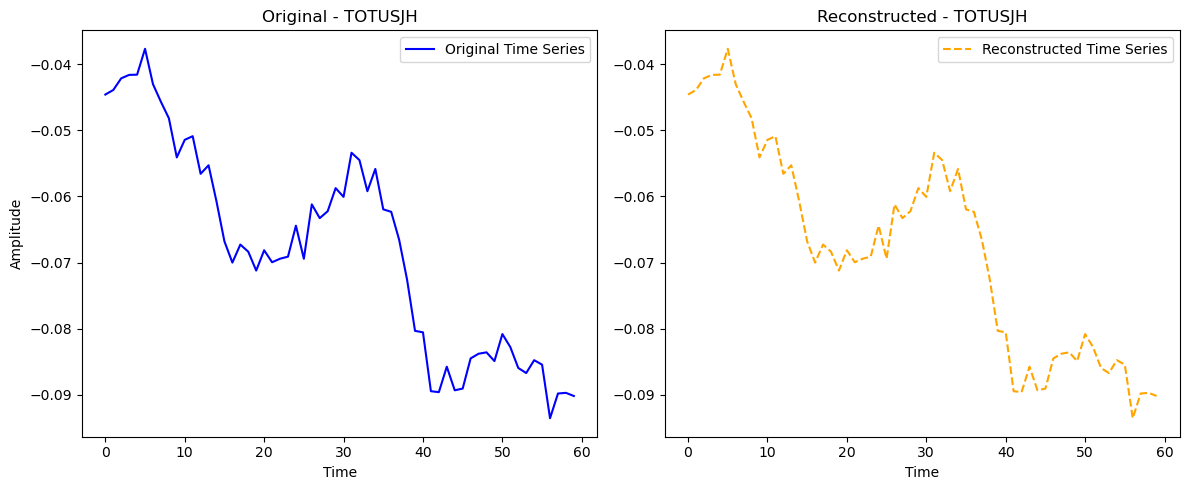

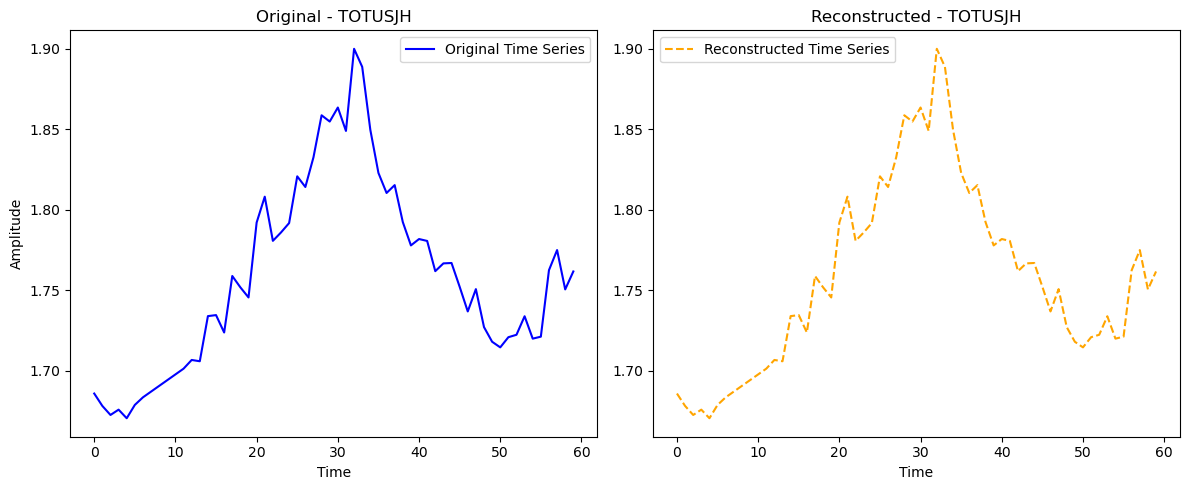

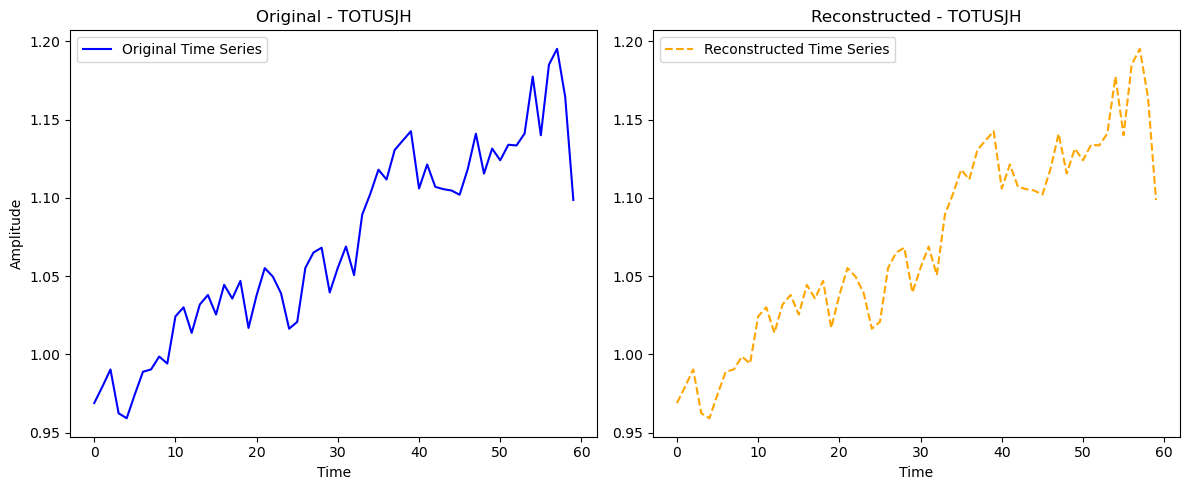

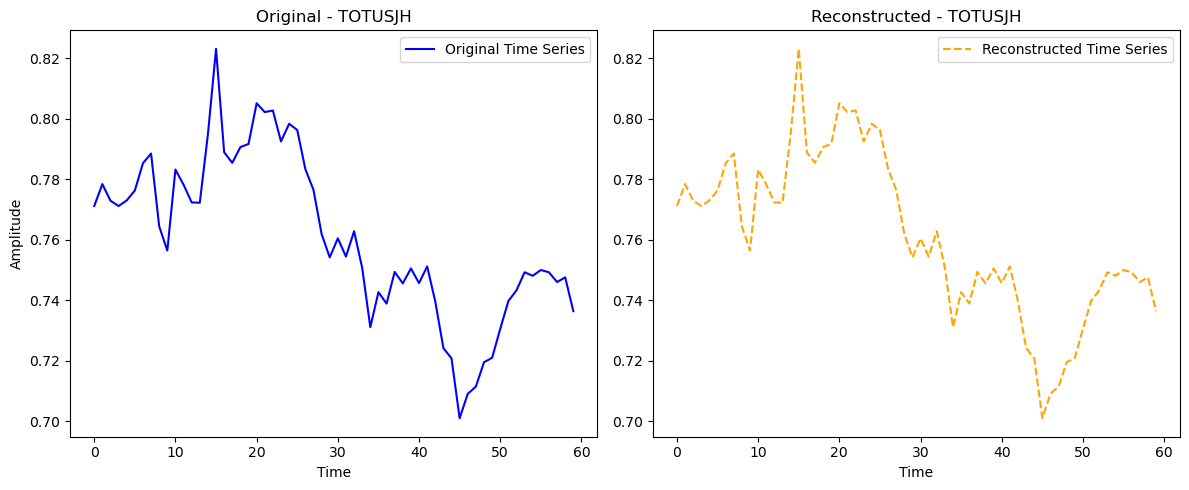

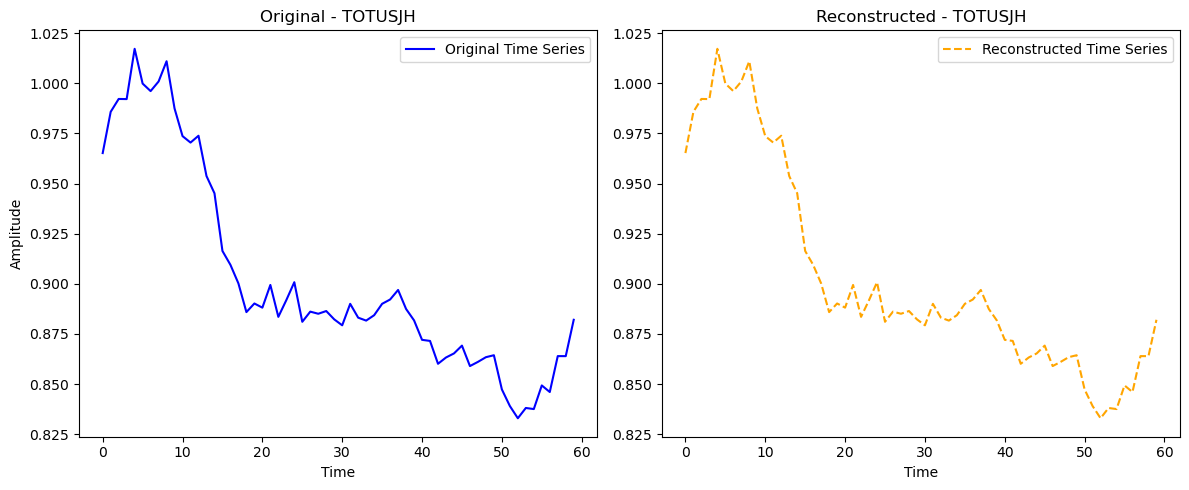

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Perform the DFT on the data
def apply_dft_to_dataset(dataset):
    # Apply DFT along the time axis (axis 1: timestamp axis)
    dft_data = np.fft.fft(dataset, axis=2)
    return dft_data

# Perform the IDFT to reconstruct the data without loss
def apply_idft_to_dataset(dft_data):
    # Apply IDFT along the time axis (axis 2: timestamp axis)
    reconstructed_data = np.fft.ifft(dft_data, axis=2).real  # Take the real part (remove small imaginary part)
    return reconstructed_data

# Visualization function for the first feature
def visualize_feature(original_data, reconstructed_data, feature_index):
    sample_index = 0  # Always use the first sample
    original_sample = original_data[sample_index, feature_index, :]
    reconstructed_sample = reconstructed_data[sample_index, feature_index, :]

    # Plot the original and reconstructed data for the first feature
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(original_sample, label='Original Time Series', color='blue')
    axes[0].set_title('Original - TOTUSJH')
    axes[0].legend()
    axes[0].set_ylabel('Amplitude')
    axes[0].set_xlabel('Time')

    axes[1].plot(reconstructed_sample, linestyle='--', label='Reconstructed Time Series', color='orange')
    axes[1].set_title('Reconstructed - TOTUSJH')
    axes[1].legend()
    axes[1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

# Main processing function for the dataset
def process_and_visualize(dataset, feature_index):
    # Step 1: Apply DFT to the dataset
    dft_data = apply_dft_to_dataset(dataset)
    
    # Step 2: Reconstruct the dataset by applying IDFT
    reconstructed_data = apply_idft_to_dataset(dft_data)
    
    # Step 3: Visualize the original and reconstructed data for the first feature
    visualize_feature(dataset, reconstructed_data, feature_index)

    return reconstructed_data
# Specify the feature index (0 for the first feature)
feature_index = 0

# Process and visualize the dataset
reconstructed_part1_dft_lossless = process_and_visualize(X_norm_part1, feature_index)
reconstructed_part2_dft_lossless = process_and_visualize(X_norm_part2, feature_index)
reconstructed_part3_dft_lossless = process_and_visualize(X_norm_part3, feature_index)
reconstructed_part4_dft_lossless = process_and_visualize(X_norm_part4, feature_index)
reconstructed_part5_dft_lossless = process_and_visualize(X_norm_part5, feature_index)


In [105]:
# Number of runs
n_runs = 10

# List to store scores for all partitions and runs
tss_scores_all_lossless = {2: [], 3: [], 4: [], 5: []}
hss_scores_all_lossless = {2: [], 3: [], 4: [], 5: []}

# Test partitions and corresponding labels
test_partitions = {
    2: (reconstructed_part2_dft_lossless, y_norm_part2),
    3: (reconstructed_part3_dft_lossless, y_norm_part3),
    4: (reconstructed_part4_dft_lossless, y_norm_part4),
    5: (reconstructed_part5_dft_lossless, y_norm_part5),
}

for run in range(n_runs):
    print(f"Run {run + 1}:")
    
    # Initialize the TimeSeriesForest classifier (ensure no fixed random_state for variability)
    tsf = MultivariateClassifier(TimeSeriesForest(
        max_depth=25, 
        min_window_size=1, 
        n_estimators=242, 
        n_windows=15, 
        min_samples_split=3, 
        min_samples_leaf=1, 
        criterion='entropy'
    ))
    
    # Fit the classifier on the training data
    tsf.fit(reconstructed_part1_dft_lossless, y_norm_part1)
    
    # Evaluate on each test partition
    for part_num, (X_test, y_test) in test_partitions.items():
        # Predict on the test data
        predictions = tsf.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, predictions)
        
        # Extract values from confusion matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        
        # Compute TSS and HSS
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        
        # Print scores for the current partition
        print(f"  Partition {part_num}: TSS: {tss:.2f}, HSS: {hss:.2f}")
        
        # Store scores
        tss_scores_all_lossless[part_num].append(tss)
        hss_scores_all_lossless[part_num].append(hss)


Run 1:
  Partition 2: TSS: 0.80, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 2:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 3:
  Partition 2: TSS: 0.80, HSS: 0.15
  Partition 3: TSS: 0.78, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 4:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 5:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 6:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 7:
  Partition 2: TSS: 0.81, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: 

In [106]:
mean_scores_lossless = {}

# Summarize results across runs for each partition
for part_num in test_partitions.keys():
    mean_tss_lossless = np.mean(tss_scores_all_lossless[part_num])
    mean_hss_lossless = np.mean(hss_scores_all_lossless[part_num])
    
    # Store the mean scores in the dictionary
    mean_scores_lossless[part_num] = {'mean_tss': mean_tss_lossless, 'mean_hss': mean_hss_lossless}
    
    print(f"\nPartition {part_num} Summary of Results:")
    print(f"  Average TSS: {mean_tss_lossless:.2f}")
    print(f"  Average HSS: {mean_hss_lossless:.2f}")


Partition 2 Summary of Results:
  Average TSS: 0.81
  Average HSS: 0.15

Partition 3 Summary of Results:
  Average TSS: 0.77
  Average HSS: 0.22

Partition 4 Summary of Results:
  Average TSS: 0.82
  Average HSS: 0.20

Partition 5 Summary of Results:
  Average TSS: 0.88
  Average HSS: 0.18


In [107]:
# Initialize variables for each partition
mean_tss_lossless_part2 = mean_scores_lossless[2]['mean_tss']
mean_hss_lossless_part2 = mean_scores_lossless[2]['mean_hss']

mean_tss_lossless_part3 = mean_scores_lossless[3]['mean_tss']
mean_hss_lossless_part3 = mean_scores_lossless[3]['mean_hss']

mean_tss_lossless_part4 = mean_scores_lossless[4]['mean_tss']
mean_hss_lossless_part4 = mean_scores_lossless[4]['mean_hss']

mean_tss_lossless_part5 = mean_scores_lossless[5]['mean_tss']
mean_hss_lossless_part5 = mean_scores_lossless[5]['mean_hss']

# Print to verify
print(f"Partition 2: Mean TSS = {mean_tss_lossless_part2:.2f}, Mean HSS = {mean_hss_lossless_part2:.2f}")
print(f"Partition 3: Mean TSS = {mean_tss_lossless_part3:.2f}, Mean HSS = {mean_hss_lossless_part3:.2f}")
print(f"Partition 4: Mean TSS = {mean_tss_lossless_part4:.2f}, Mean HSS = {mean_hss_lossless_part4:.2f}")
print(f"Partition 5: Mean TSS = {mean_tss_lossless_part5:.2f}, Mean HSS = {mean_hss_lossless_part5:.2f}")


Partition 2: Mean TSS = 0.81, Mean HSS = 0.15
Partition 3: Mean TSS = 0.77, Mean HSS = 0.22
Partition 4: Mean TSS = 0.82, Mean HSS = 0.20
Partition 5: Mean TSS = 0.88, Mean HSS = 0.18


### DFT Lossy

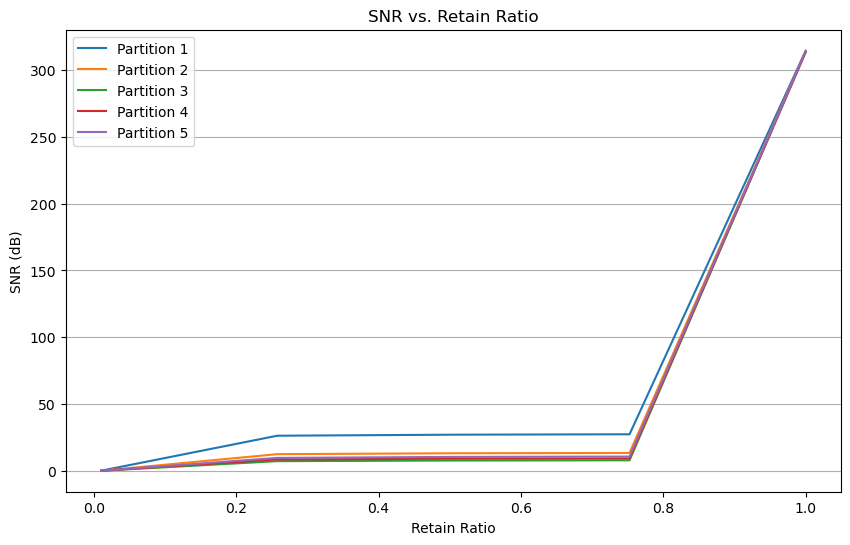

In [152]:

def apply_dft_to_dataset(dataset):
    """Perform DFT on the dataset along the time axis (axis 2)."""
    dft_data = np.fft.fft(dataset, axis=2)
    return dft_data

def apply_filtered_idft(dft_data, retain_ratio):
    """Perform lossy IDFT by applying a low-pass filter based on the retain ratio."""
    num_samples, num_features, num_timestamps = dft_data.shape
    retain_count = int(retain_ratio * num_timestamps)
    
    # Create a mask to keep only the low frequencies
    mask = np.zeros_like(dft_data, dtype=bool)
    mask[:, :, :retain_count] = True  # Retain the first `retain_count` frequencies
    
    # Apply the mask to retain only the low frequencies
    filtered_dft_data = np.where(mask, dft_data, 0)
    
    # Reconstruct the signal using the inverse DFT
    reconstructed_data = np.fft.ifft(filtered_dft_data, axis=2).real
    return reconstructed_data

def compute_snr(original_data, reconstructed_data):
    """
    Compute Signal-to-Noise Ratio (SNR) between the original and reconstructed data.
    Higher values indicate better preservation of the original signal.
    """
    signal_power = np.sum(original_data**2)
    noise_power = np.sum((original_data - reconstructed_data)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def process_dataset_for_snr(dataset, retain_ratios):
    """
    Process a dataset and compute SNR for a range of retain ratios.
    """
    dft_data = apply_dft_to_dataset(dataset)
    snr_values = []
    for ratio in retain_ratios:
        reconstructed_data = apply_filtered_idft(dft_data, ratio)
        snr = compute_snr(dataset, reconstructed_data)
        snr_values.append(snr)
    return snr_values

# Specify a range of retain ratios to evaluate
retain_ratios = np.linspace(0.01, 1.0, 5)  # 1% to 100% retain ratio

# Compute SNR values for each dataset and retain ratio
snr_part1 = process_dataset_for_snr(X_norm_part1, retain_ratios)
snr_part2 = process_dataset_for_snr(X_norm_part2, retain_ratios)
snr_part3 = process_dataset_for_snr(X_norm_part3, retain_ratios)
snr_part4 = process_dataset_for_snr(X_norm_part4, retain_ratios)
snr_part5 = process_dataset_for_snr(X_norm_part5, retain_ratios)

# Plot SNR vs. retain ratio
plt.figure(figsize=(10, 6))
plt.plot(retain_ratios, snr_part1, label='Partition 1')
plt.plot(retain_ratios, snr_part2, label='Partition 2')
plt.plot(retain_ratios, snr_part3, label='Partition 3')
plt.plot(retain_ratios, snr_part4, label='Partition 4')
plt.plot(retain_ratios, snr_part5, label='Partition 5')

plt.title('SNR vs. Retain Ratio')
plt.xlabel('Retain Ratio')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid(axis='y')  # Horizontal grid lines only
plt.savefig('C:/Users/victo/OneDrive/Documents/GSU/DMLab/paper/Images/snr.pdf')
plt.show()


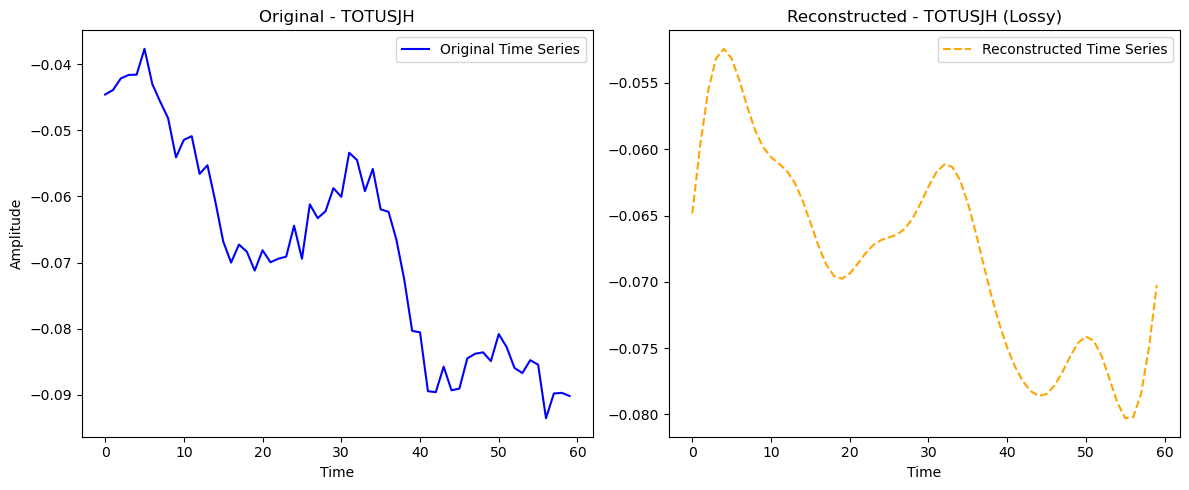

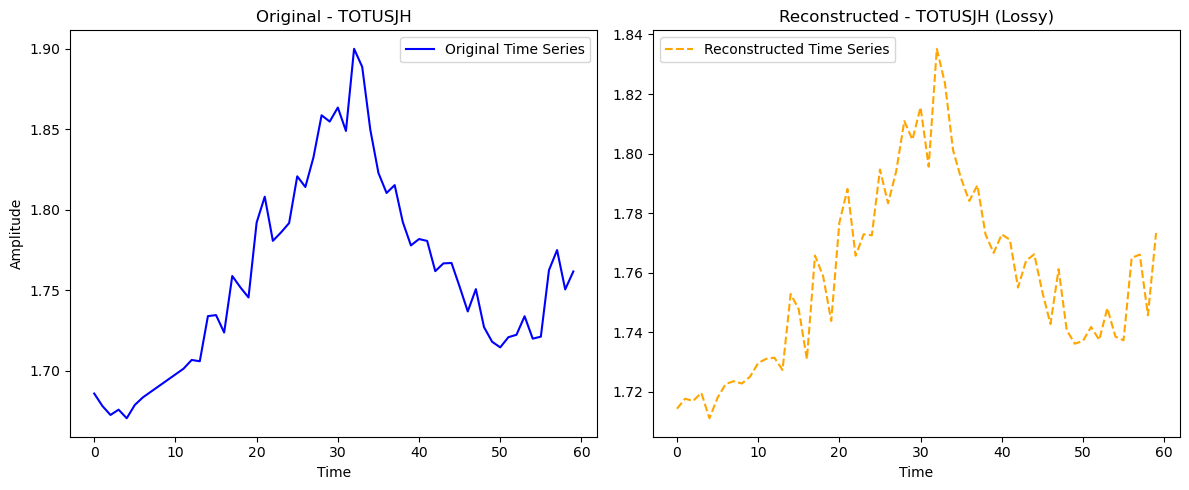

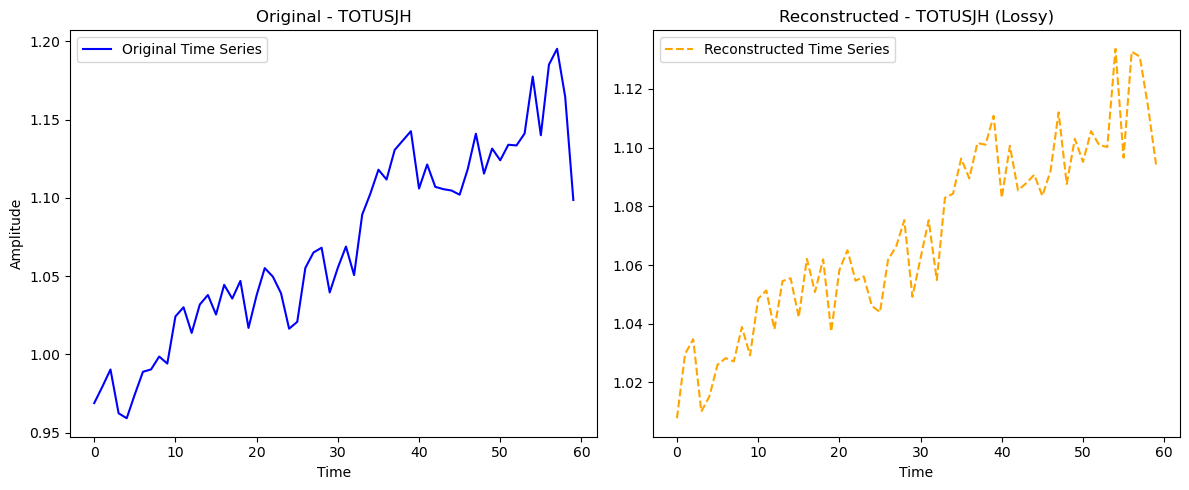

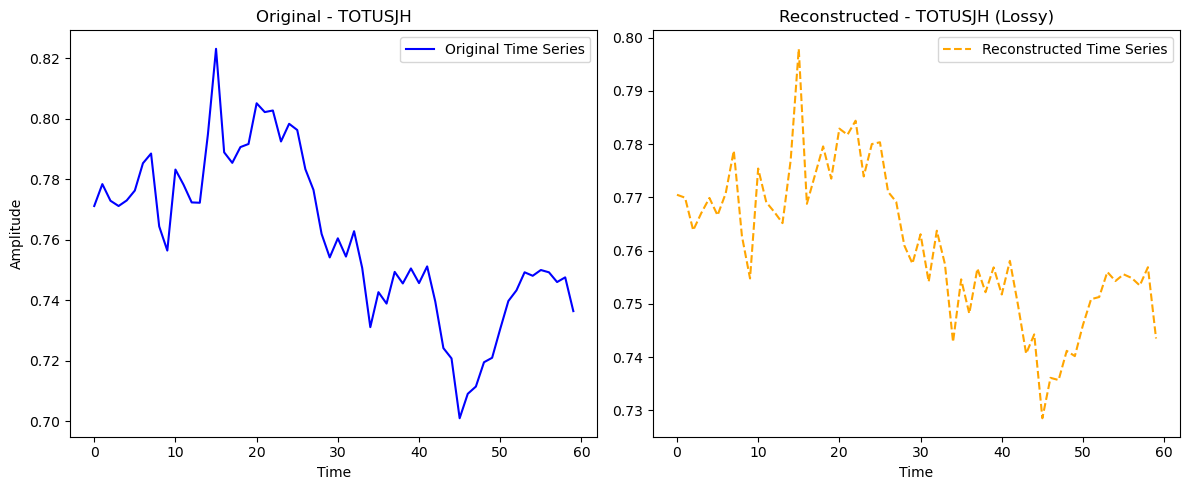

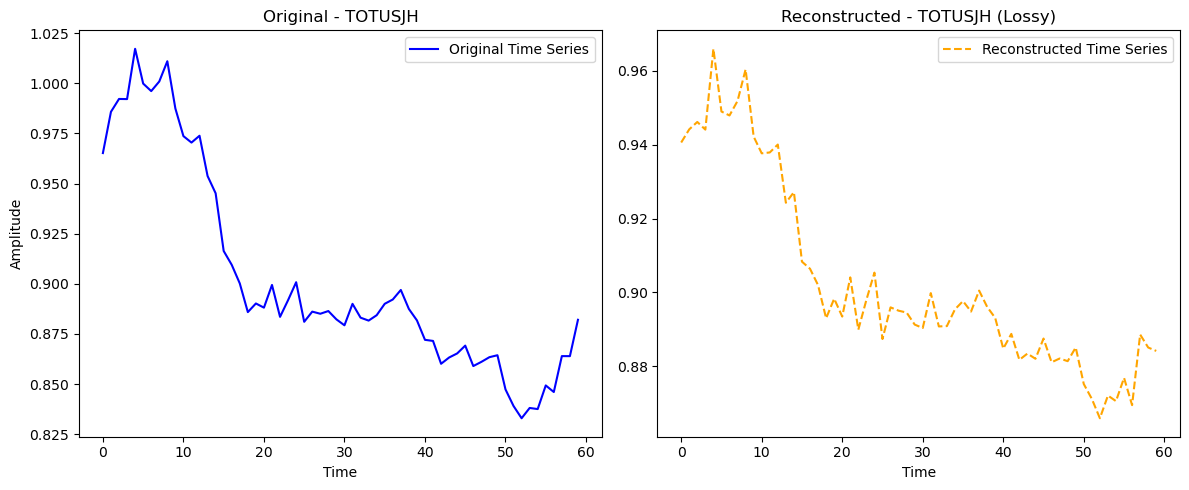

In [153]:

def visualize_feature(original_data, reconstructed_data, feature_index):
    """
    Visualize the original and reconstructed data for the first feature.
    """
    sample_index = 0  # Always use the first sample
    original_sample = original_data[sample_index, feature_index, :]
    reconstructed_sample = reconstructed_data[sample_index, feature_index, :]

    # Plot the original and reconstructed data for the first feature
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(original_sample, label='Original Time Series', color='blue')
    axes[0].set_title('Original - TOTUSJH')
    axes[0].legend()
    axes[0].set_ylabel('Amplitude')
    axes[0].set_xlabel('Time')

    axes[1].plot(reconstructed_sample, linestyle='--', label='Reconstructed Time Series', color='orange')
    axes[1].set_title('Reconstructed - TOTUSJH (Lossy)')
    axes[1].legend()
    axes[1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

# Main processing function
def process_and_visualize(dataset, feature_index, retain_ratio):
    # Step 1: Apply DFT
    dft_data = apply_dft_to_dataset(dataset)
    
    # Step 2: Reconstruct with filtered frequencies
    reconstructed_data = apply_filtered_idft(dft_data, retain_ratio)
    
    # Step 3: Visualize
    visualize_feature(dataset, reconstructed_data, feature_index)
    
    return reconstructed_data

# Example Usage
feature_index = 0  # First feature
retain_ratio = 0.75  # Retain top 70% of frequencies

reconstructed_part1_dft_lossy = process_and_visualize(X_norm_part1, feature_index, retain_ratio=0.12)
reconstructed_part2_dft_lossy = process_and_visualize(X_norm_part2, feature_index, retain_ratio)
reconstructed_part3_dft_lossy = process_and_visualize(X_norm_part3, feature_index, retain_ratio)
reconstructed_part4_dft_lossy = process_and_visualize(X_norm_part4, feature_index, retain_ratio)
reconstructed_part5_dft_lossy = process_and_visualize(X_norm_part5, feature_index, retain_ratio)


In [154]:
# Number of runs
n_runs = 10

# List to store scores for all partitions and runs
tss_scores_all_lossy = {2: [], 3: [], 4: [], 5: []}
hss_scores_all_lossy = {2: [], 3: [], 4: [], 5: []}

# Test partitions and corresponding labels
test_partitions = {
    2: (reconstructed_part2_dft_lossy, y_norm_part2),
    3: (reconstructed_part3_dft_lossy, y_norm_part3),
    4: (reconstructed_part4_dft_lossy, y_norm_part4),
    5: (reconstructed_part5_dft_lossy, y_norm_part5),
}

for run in range(n_runs):
    print(f"Run {run + 1}:")
    
    # Initialize the TimeSeriesForest classifier (ensure no fixed random_state for variability)
    tsf = MultivariateClassifier(TimeSeriesForest(
        max_depth=25, 
        min_window_size=1, 
        n_estimators=242, 
        n_windows=15, 
        min_samples_split=3, 
        min_samples_leaf=1, 
        criterion='entropy'
    ))
    
    # Fit the classifier on the training data
    tsf.fit(reconstructed_part1_dft_lossy, y_norm_part1)
    
    # Evaluate on each test partition
    for part_num, (X_test, y_test) in test_partitions.items():
        # Predict on the test data
        predictions = tsf.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, predictions)
        
        # Extract values from confusion matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        
        # Compute TSS and HSS
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        
        # Print scores for the current partition
        print(f"  Partition {part_num}: TSS: {tss:.2f}, HSS: {hss:.2f}")
        
        # Store scores
        tss_scores_all_lossy[part_num].append(tss)
        hss_scores_all_lossy[part_num].append(hss)


Run 1:
  Partition 2: TSS: 0.81, HSS: 0.14
  Partition 3: TSS: 0.76, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 2:
  Partition 2: TSS: 0.80, HSS: 0.14
  Partition 3: TSS: 0.77, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 3:
  Partition 2: TSS: 0.80, HSS: 0.14
  Partition 3: TSS: 0.77, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 4:
  Partition 2: TSS: 0.81, HSS: 0.14
  Partition 3: TSS: 0.76, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 5:
  Partition 2: TSS: 0.81, HSS: 0.14
  Partition 3: TSS: 0.77, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 6:
  Partition 2: TSS: 0.81, HSS: 0.14
  Partition 3: TSS: 0.77, HSS: 0.20
  Partition 4: TSS: 0.81, HSS: 0.18
  Partition 5: TSS: 0.87, HSS: 0.16
Run 7:
  Partition 2: TSS: 0.80, HSS: 0.14
  Partition 3: TSS: 0.76, HSS: 0.20
  Partition 4: 

In [155]:
mean_scores_lossy = {}

# Summarize results across runs for each partition
for part_num in test_partitions.keys():
    mean_tss_lossy = np.mean(tss_scores_all_lossy[part_num])
    mean_hss_lossy = np.mean(hss_scores_all_lossy[part_num])
    
    # Store the mean scores in the dictionary
    mean_scores_lossy[part_num] = {'mean_tss': mean_tss_lossy, 'mean_hss': mean_hss_lossy}
    
    print(f"\nPartition {part_num} Summary of Results:")
    print(f"  Average TSS: {mean_tss_lossy:.2f}")
    print(f"  Average HSS: {mean_hss_lossy:.2f}")


Partition 2 Summary of Results:
  Average TSS: 0.80
  Average HSS: 0.14

Partition 3 Summary of Results:
  Average TSS: 0.77
  Average HSS: 0.20

Partition 4 Summary of Results:
  Average TSS: 0.81
  Average HSS: 0.18

Partition 5 Summary of Results:
  Average TSS: 0.87
  Average HSS: 0.16


In [156]:
# Initialize variables for each partition
mean_tss_lossy_part2 = mean_scores_lossy[2]['mean_tss']
mean_hss_lossy_part2 = mean_scores_lossy[2]['mean_hss']

mean_tss_lossy_part3 = mean_scores_lossy[3]['mean_tss']
mean_hss_lossy_part3 = mean_scores_lossy[3]['mean_hss']

mean_tss_lossy_part4 = mean_scores_lossy[4]['mean_tss']
mean_hss_lossy_part4 = mean_scores_lossy[4]['mean_hss']

mean_tss_lossy_part5 = mean_scores_lossy[5]['mean_tss']
mean_hss_lossy_part5 = mean_scores_lossy[5]['mean_hss']

# Print to verify
print(f"Partition 2: Mean TSS = {mean_tss_lossy_part2:.2f}, Mean HSS = {mean_hss_lossy_part2:.2f}")
print(f"Partition 3: Mean TSS = {mean_tss_lossy_part3:.2f}, Mean HSS = {mean_hss_lossy_part3:.2f}")
print(f"Partition 4: Mean TSS = {mean_tss_lossy_part4:.2f}, Mean HSS = {mean_hss_lossy_part4:.2f}")
print(f"Partition 5: Mean TSS = {mean_tss_lossy_part5:.2f}, Mean HSS = {mean_hss_lossy_part5:.2f}")


Partition 2: Mean TSS = 0.80, Mean HSS = 0.14
Partition 3: Mean TSS = 0.77, Mean HSS = 0.20
Partition 4: Mean TSS = 0.81, Mean HSS = 0.18
Partition 5: Mean TSS = 0.87, Mean HSS = 0.16


### HAAR LOSSY

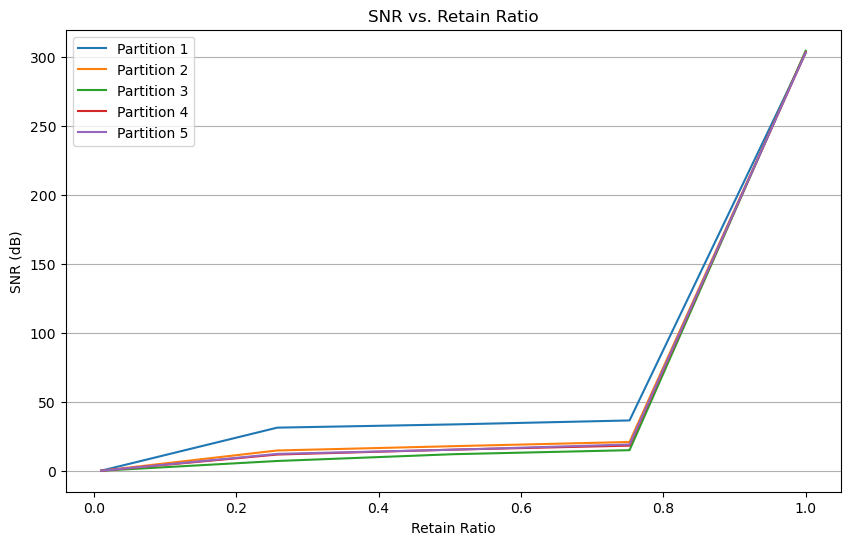

In [157]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

def apply_hwt_to_dataset(dataset):
    """Perform Haar Wavelet Transform (HWT) on the dataset along the time axis (axis 2)."""
    transformed_data = []
    coeff_slices = []
    for sample in dataset:
        transformed_sample = []
        slices = []
        for feature in sample:
            coeffs, slice_info = pywt.coeffs_to_array(pywt.wavedec(feature, wavelet='haar'))
            transformed_sample.append(coeffs)
            slices.append(slice_info)
        transformed_data.append(transformed_sample)
        coeff_slices.append(slices)
    return np.array(transformed_data), coeff_slices

def apply_filtered_iwt(transformed_data, coeff_slices, retain_ratio):
    """Perform lossy inverse Haar Wavelet Transform (IWT) by applying a low-pass filter based on the retain ratio."""
    reconstructed_data = []
    for transformed_sample, sample_slices in zip(transformed_data, coeff_slices):
        reconstructed_sample = []
        for coeffs, slice_info in zip(transformed_sample, sample_slices):
            retain_count = int(len(coeffs) * retain_ratio)
            filtered_coeffs = np.zeros_like(coeffs)
            filtered_coeffs[:retain_count] = coeffs[:retain_count]
            reconstructed_signal = pywt.waverec(pywt.array_to_coeffs(filtered_coeffs, slice_info, output_format='wavedec'), wavelet='haar')
            reconstructed_sample.append(reconstructed_signal[:len(coeffs)])  # Truncate to original length
        reconstructed_data.append(reconstructed_sample)
    return np.array(reconstructed_data)

def compute_snr(original_data, reconstructed_data):
    """
    Compute Signal-to-Noise Ratio (SNR) between the original and reconstructed data.
    Higher values indicate better preservation of the original signal.
    """
    signal_power = np.sum(original_data**2)
    noise_power = np.sum((original_data - reconstructed_data)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def process_dataset_for_snr(dataset, retain_ratios):
    """
    Process a dataset and compute SNR for a range of retain ratios using Haar Wavelet Transform.
    """
    transformed_data, coeff_slices = apply_hwt_to_dataset(dataset)
    snr_values = []
    for ratio in retain_ratios:
        reconstructed_data = apply_filtered_iwt(transformed_data, coeff_slices, ratio)
        snr = compute_snr(dataset, reconstructed_data)
        snr_values.append(snr)
    return snr_values

# Specify a range of retain ratios to evaluate
retain_ratios = np.linspace(0.01, 1.0, 5)  # 1% to 100% retain ratio

# Compute SNR values for each dataset and retain ratio
snr_part1 = process_dataset_for_snr(X_norm_part1, retain_ratios)
snr_part2 = process_dataset_for_snr(X_norm_part2, retain_ratios)
snr_part3 = process_dataset_for_snr(X_norm_part3, retain_ratios)
snr_part4 = process_dataset_for_snr(X_norm_part4, retain_ratios)
snr_part5 = process_dataset_for_snr(X_norm_part5, retain_ratios)

# Plot SNR vs. retain ratio
plt.figure(figsize=(10, 6))
plt.plot(retain_ratios, snr_part1, label='Partition 1')
plt.plot(retain_ratios, snr_part2, label='Partition 2')
plt.plot(retain_ratios, snr_part3, label='Partition 3')
plt.plot(retain_ratios, snr_part4, label='Partition 4')
plt.plot(retain_ratios, snr_part5, label='Partition 5')

plt.title('SNR vs. Retain Ratio')
plt.xlabel('Retain Ratio')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid(axis='y')  # Horizontal grid lines only
plt.savefig('C:/Users/victo/OneDrive/Documents/GSU/DMLab/paper/Images/snr_hwt.pdf')
plt.show()


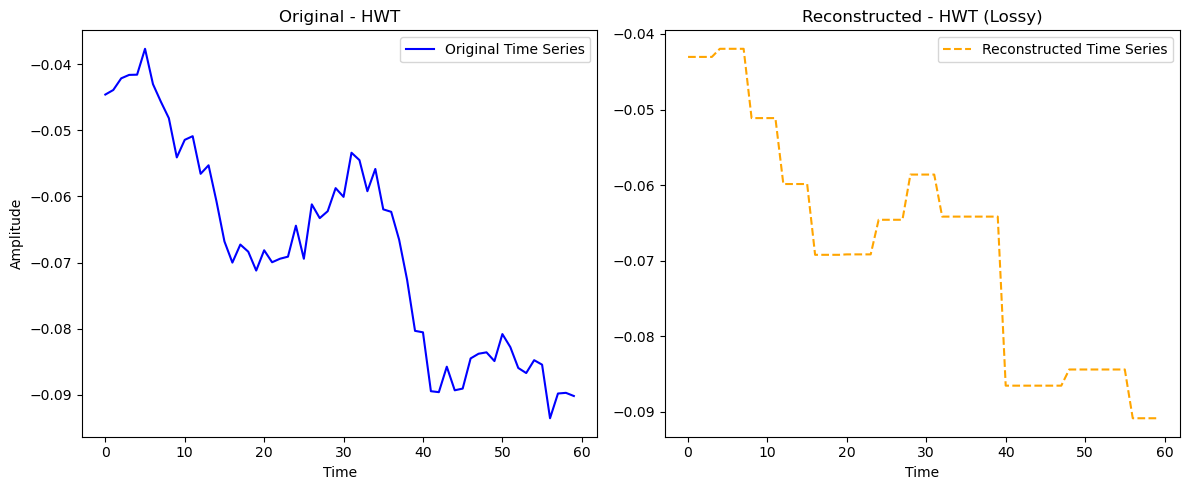

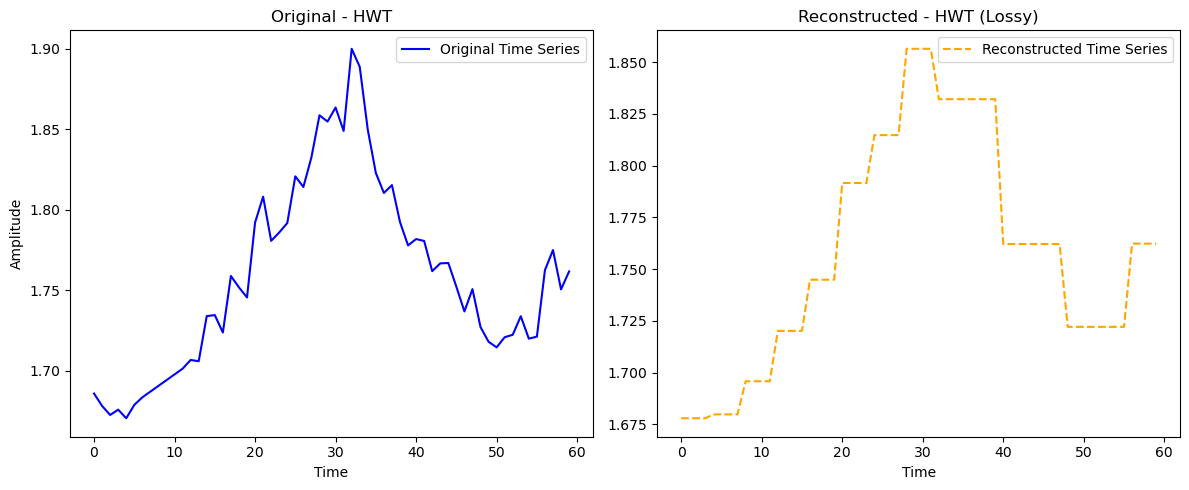

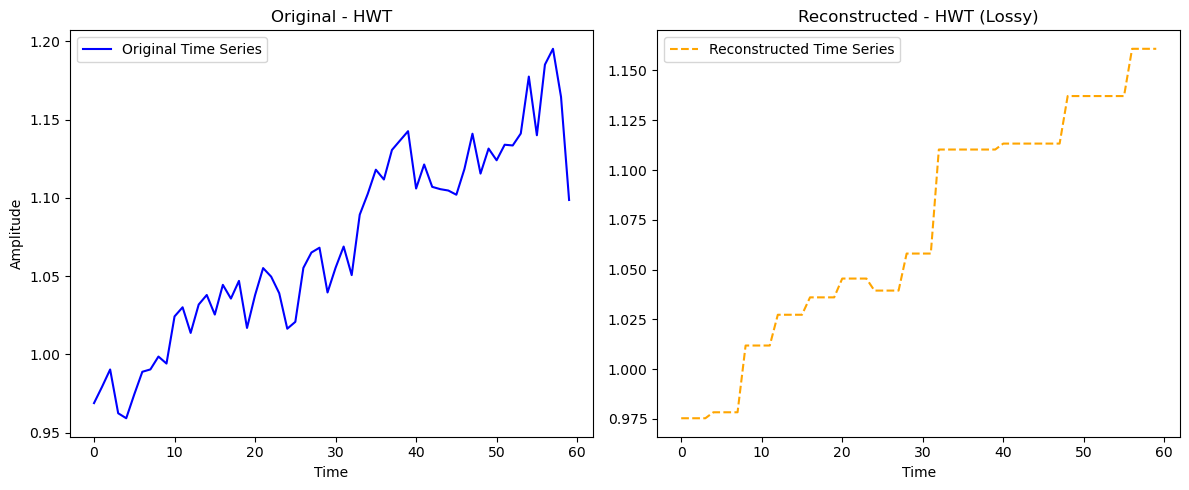

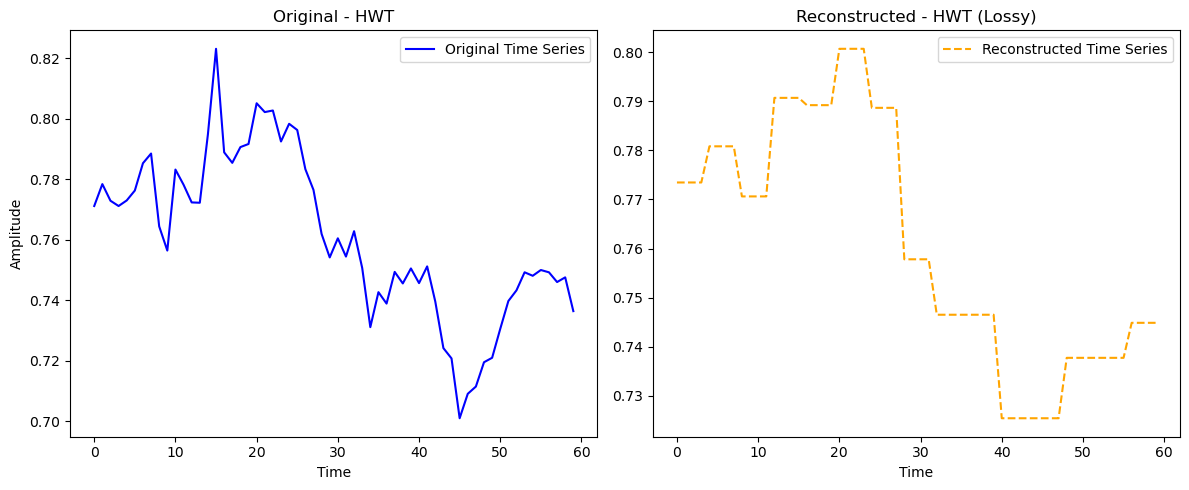

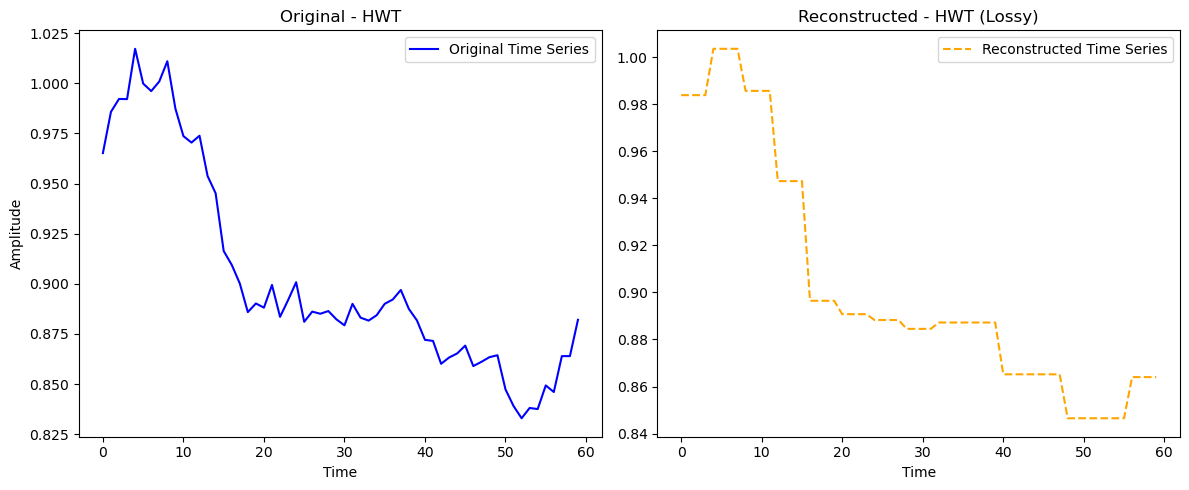

In [163]:
def visualize_feature_hwt(original_data, reconstructed_data, feature_index, sample_index=0):
    """
    Visualize the original and reconstructed data for the first feature using HWT.
    """
    original_sample = original_data[sample_index, feature_index, :]
    reconstructed_sample = reconstructed_data[sample_index, feature_index, :]

    # Plot the original and reconstructed data for the first feature
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[0].plot(original_sample, label='Original Time Series', color='blue')
    axes[0].set_title('Original - HWT')
    axes[0].legend()
    axes[0].set_ylabel('Amplitude')
    axes[0].set_xlabel('Time')

    axes[1].plot(reconstructed_sample, linestyle='--', label='Reconstructed Time Series', color='orange')
    axes[1].set_title('Reconstructed - HWT (Lossy)')
    axes[1].legend()
    axes[1].set_xlabel('Time')

    plt.tight_layout()
    plt.show()

# Main processing function for HWT
def process_and_visualize_hwt(dataset, feature_index, retain_ratio, sample_index=0):
    # Step 1: Apply HWT to the dataset
    transformed_data, coeff_slices = apply_hwt_to_dataset(dataset)
    
    # Step 2: Perform inverse HWT with filtered coefficients based on retain ratio
    reconstructed_data = apply_filtered_iwt(transformed_data, coeff_slices, retain_ratio)
    
    # Step 3: Visualize the feature
    visualize_feature_hwt(dataset, reconstructed_data, feature_index, sample_index)
    
    return reconstructed_data

# Example Usage
feature_index = 0  # First feature
retain_ratio = 0.2  # Retain top 75% of coefficients

# Process and visualize for each partition
reconstructed_part1_hwt_lossy = process_and_visualize_hwt(X_norm_part1, feature_index, retain_ratio)
reconstructed_part2_hwt_lossy = process_and_visualize_hwt(X_norm_part2, feature_index, retain_ratio)
reconstructed_part3_hwt_lossy = process_and_visualize_hwt(X_norm_part3, feature_index, retain_ratio)
reconstructed_part4_hwt_lossy = process_and_visualize_hwt(X_norm_part4, feature_index, retain_ratio)
reconstructed_part5_hwt_lossy = process_and_visualize_hwt(X_norm_part5, feature_index, retain_ratio)


In [164]:
# Number of runs
n_runs = 10

# List to store scores for all partitions and runs
tss_scores_all_hwt_lossy = {2: [], 3: [], 4: [], 5: []}
hss_scores_all_hwt_lossy = {2: [], 3: [], 4: [], 5: []}

# Test partitions and corresponding labels
test_partitions = {
    2: (reconstructed_part2_hwt_lossy, y_norm_part2),
    3: (reconstructed_part3_hwt_lossy, y_norm_part3),
    4: (reconstructed_part4_hwt_lossy, y_norm_part4),
    5: (reconstructed_part5_hwt_lossy, y_norm_part5),
}

for run in range(n_runs):
    print(f"Run {run + 1}:")
    
    # Initialize the TimeSeriesForest classifier (ensure no fixed random_state for variability)
    tsf = MultivariateClassifier(TimeSeriesForest(
        max_depth=25, 
        min_window_size=1, 
        n_estimators=242, 
        n_windows=15, 
        min_samples_split=3, 
        min_samples_leaf=1, 
        criterion='entropy'
    ))
    
    # Fit the classifier on the training data
    tsf.fit(reconstructed_part1_hwt_lossy, y_norm_part1)
    
    # Evaluate on each test partition
    for part_num, (X_test, y_test) in test_partitions.items():
        # Predict on the test data
        predictions = tsf.predict(X_test)
        
        # Compute confusion matrix
        conf_matrix = confusion_matrix(y_test, predictions)
        
        # Extract values from confusion matrix
        tn, fp, fn, tp = conf_matrix.ravel()
        
        # Compute TSS and HSS
        tss = (tp / (tp + fn)) - (fp / (fp + tn))
        hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
        
        # Print scores for the current partition
        print(f"  Partition {part_num}: TSS: {tss:.2f}, HSS: {hss:.2f}")
        
        # Store scores
        tss_scores_all_hwt_lossy[part_num].append(tss)
        hss_scores_all_hwt_lossy[part_num].append(hss)


Run 1:
  Partition 2: TSS: 0.81, HSS: 0.16
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 2:
  Partition 2: TSS: 0.80, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 3:
  Partition 2: TSS: 0.81, HSS: 0.16
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 4:
  Partition 2: TSS: 0.80, HSS: 0.16
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 5:
  Partition 2: TSS: 0.80, HSS: 0.15
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.88, HSS: 0.18
Run 6:
  Partition 2: TSS: 0.81, HSS: 0.16
  Partition 3: TSS: 0.77, HSS: 0.22
  Partition 4: TSS: 0.82, HSS: 0.20
  Partition 5: TSS: 0.87, HSS: 0.18
Run 7:
  Partition 2: TSS: 0.81, HSS: 0.16
  Partition 3: TSS: 0.76, HSS: 0.22
  Partition 4: 

In [167]:
mean_scores_hwt_lossy = {}

# Summarize results across runs for each partition
for part_num in test_partitions.keys():
    mean_tss_hwt_lossy = np.mean(tss_scores_all_hwt_lossy[part_num])
    mean_hss_hwt_lossy = np.mean(hss_scores_all_hwt_lossy[part_num])
    
    # Store the mean scores in the dictionary
    mean_scores_hwt_lossy[part_num] = {'mean_tss': mean_tss_hwt_lossy, 'mean_hss': mean_hss_hwt_lossy}
    
    print(f"\nPartition {part_num} Summary of Results:")
    print(f"  Average TSS: {mean_tss_hwt_lossy:.2f}")
    print(f"  Average HSS: {mean_hss_hwt_lossy:.2f}")


Partition 2 Summary of Results:
  Average TSS: 0.81
  Average HSS: 0.16

Partition 3 Summary of Results:
  Average TSS: 0.77
  Average HSS: 0.22

Partition 4 Summary of Results:
  Average TSS: 0.82
  Average HSS: 0.20

Partition 5 Summary of Results:
  Average TSS: 0.88
  Average HSS: 0.18


In [166]:
# Initialize variables for each partition
mean_tss_lossy_hwt_part2 = mean_scores_hwt_lossy[2]['mean_tss']
mean_hss_lossy_hwt_part2 = mean_scores_hwt_lossy[2]['mean_hss']

mean_tss_lossy_hwt_part3 = mean_scores_hwt_lossy[3]['mean_tss']
mean_hss_lossy_hwt_part3 = mean_scores_hwt_lossy[3]['mean_hss']

mean_tss_lossy_hwt_part4 = mean_scores_hwt_lossy[4]['mean_tss']
mean_hss_lossy_hwt_part4 = mean_scores_hwt_lossy[4]['mean_hss']

mean_tss_lossy_hwt_part5 = mean_scores_hwt_lossy[5]['mean_tss']
mean_hss_lossy_hwt_part5 = mean_scores_hwt_lossy[5]['mean_hss']

# Print to verify
print(f"Partition 2: Mean TSS = {mean_tss_lossy_hwt_part2:.2f}, Mean HSS = {mean_hss_lossy_hwt_part2:.2f}")
print(f"Partition 3: Mean TSS = {mean_tss_lossy_hwt_part3:.2f}, Mean HSS = {mean_hss_lossy_hwt_part3:.2f}")
print(f"Partition 4: Mean TSS = {mean_tss_lossy_hwt_part4:.2f}, Mean HSS = {mean_hss_lossy_hwt_part4:.2f}")
print(f"Partition 5: Mean TSS = {mean_tss_lossy_hwt_part5:.2f}, Mean HSS = {mean_hss_lossy_hwt_part5:.2f}")


Partition 2: Mean TSS = 0.81, Mean HSS = 0.16
Partition 3: Mean TSS = 0.77, Mean HSS = 0.22
Partition 4: Mean TSS = 0.82, Mean HSS = 0.20
Partition 5: Mean TSS = 0.88, Mean HSS = 0.18


### DAUBECHIES LOSSY

In [173]:
def apply_wavelet_transform_to_dataset(dataset, wavelet='db1', level=3):
    """Perform Daubechies wavelet transform on the dataset along the time axis (axis 2)."""
    wavelet_data = np.empty((dataset.shape[0], dataset.shape[1]), dtype=object)  # Store as objects (list of arrays)
    
    for i in range(dataset.shape[0]):  # Loop over all samples
        for j in range(dataset.shape[1]):  # Loop over all features
            coeffs = pywt.wavedec(dataset[i, j, :], wavelet, level=level)
            wavelet_data[i, j] = coeffs  # Store the list of coefficients
    
    return wavelet_data

def apply_filtered_wavelet_reconstruction(wavelet_data, retain_ratio, wavelet='db1'):
    """Perform lossy wavelet reconstruction by applying a low-pass filter based on the retain ratio."""
    num_samples, num_features = wavelet_data.shape  # Removed the third dimension
    filtered_wavelet_data = np.zeros_like(wavelet_data, dtype=object)
    
    for i in range(num_samples):
        for j in range(num_features):
            coeffs = wavelet_data[i, j]
            # Number of coefficients to retain (only approximation coefficients)
            approx_coeffs = coeffs[0]
            retain_count = int(len(approx_coeffs) * retain_ratio)
            coeffs[0] = approx_coeffs[:retain_count]  # Keep the low frequencies
            
            # Zero out detail coefficients (high frequencies)
            for k in range(1, len(coeffs)):  # Starting from 1 to skip approximation coefficients
                coeffs[k] = np.zeros_like(coeffs[k])  # Zero out the high-frequency components
            
            # Ensure the coefficient list has the correct length for reconstruction
            # This step ensures that the length of coeffs is consistent for reconstruction
            if len(coeffs) < 4:  # If there are fewer than 4 levels of coefficients, fill the rest with empty arrays
                coeffs.extend([np.zeros_like(coeffs[0])] * (4 - len(coeffs)))
            
            # Reconstruct the signal using the inverse wavelet transform
            filtered_wavelet_data[i, j] = pywt.waverec(coeffs, wavelet)
    
    return filtered_wavelet_data
   
    
def compute_snr(original_data, reconstructed_data):
    """
    Compute Signal-to-Noise Ratio (SNR) between the original and reconstructed data.
    Higher values indicate better preservation of the original signal.
    """
    signal_power = np.sum(original_data**2)
    noise_power = np.sum((original_data - reconstructed_data)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def process_dataset_for_snr(dataset, retain_ratios, wavelet='db1', level=3):
    """
    Process a dataset and compute SNR for a range of retain ratios using Daubechies wavelet transform.
    """
    wavelet_data = apply_wavelet_transform_to_dataset(dataset, wavelet, level)
    snr_values = []
    for ratio in retain_ratios:
        reconstructed_data = apply_filtered_wavelet_reconstruction(wavelet_data, ratio, wavelet)
        snr = compute_snr(dataset, reconstructed_data)
        snr_values.append(snr)
    return snr_values

# Specify a range of retain ratios to evaluate
retain_ratios = np.linspace(0.01, 1.0, 5)  # 1% to 100% retain ratio

# Compute SNR values for each dataset and retain ratio
snr_part1 = process_dataset_for_snr(X_norm_part1, retain_ratios, wavelet='db1', level=3)
snr_part2 = process_dataset_for_snr(X_norm_part2, retain_ratios, wavelet='db1', level=3)
snr_part3 = process_dataset_for_snr(X_norm_part3, retain_ratios, wavelet='db1', level=3)
snr_part4 = process_dataset_for_snr(X_norm_part4, retain_ratios, wavelet='db1', level=3)
snr_part5 = process_dataset_for_snr(X_norm_part5, retain_ratios, wavelet='db1', level=3)

# Plot SNR vs. retain ratio
plt.figure(figsize=(10, 6))
plt.plot(retain_ratios, snr_part1, label='Partition 1')
plt.plot(retain_ratios, snr_part2, label='Partition 2')
plt.plot(retain_ratios, snr_part3, label='Partition 3')
plt.plot(retain_ratios, snr_part4, label='Partition 4')
plt.plot(retain_ratios, snr_part5, label='Partition 5')

plt.title('SNR vs. Retain Ratio (Daubechies Wavelet)')
plt.xlabel('Retain Ratio')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid(axis='y')  # Horizontal grid lines only
plt.savefig('C:/Users/victo/OneDrive/Documents/GSU/DMLab/paper/Images/snr_wavelet.pdf')
plt.show()

ValueError: coefficient shape mismatch

# DFT Parametric (Phase + Amplitude)

In [117]:
import numpy as np

def process_fft(data):
    # Number of samples, number of observations, number of features
    num_samples, num_observations, num_features = data.shape
    
    # Initialize an array to hold the transformed data (same shape as the input)
    new_data = np.zeros((num_samples, 60, num_features))
    
    # Loop over each feature
    for i in range(num_features):
        # Perform FFT along the observation axis for each feature
        fft_result = np.fft.fft(data[:, :, i], axis=1)
        
        # Get the amplitudes (absolute values) of the first 30 frequency components
        amplitudes = np.abs(fft_result[:, :30])
        
        # Get the phases (angles) of the last 30 frequency components
        phases = np.angle(fft_result[:, -30:])
        
        # Concatenate amplitudes and phases along the observation axis
        new_data[:, :, i] = np.concatenate((amplitudes, phases), axis=1)
    
    return new_data

# Example usage with random data:
# data shape: (number_of_samples, 60 observations, number_of_features)
# Example: data = np.random.randn(100, 60, 10)  # 100 samples, 60 observations, 10 features



# new_data will have the shape (number_of_samples, 60, number_of_features)


In [122]:
X_norm_part1 = process_fft(X_norm_part1)

In [295]:
# model from lossy decomposition
rf = MultivariateClassifier(RandomForestClassifier(max_depth = None, n_estimators= 150,random_state=42))
# Fit the classifier on the training data
rf.fit(param_p1, downsampled_p1_y) 

MultivariateClassifier(estimator=RandomForestClassifier(n_estimators=150,
                                                        random_state=42))

Original shape: (88557, 2, 5)
Summarized shape: (88557, 2, 5)


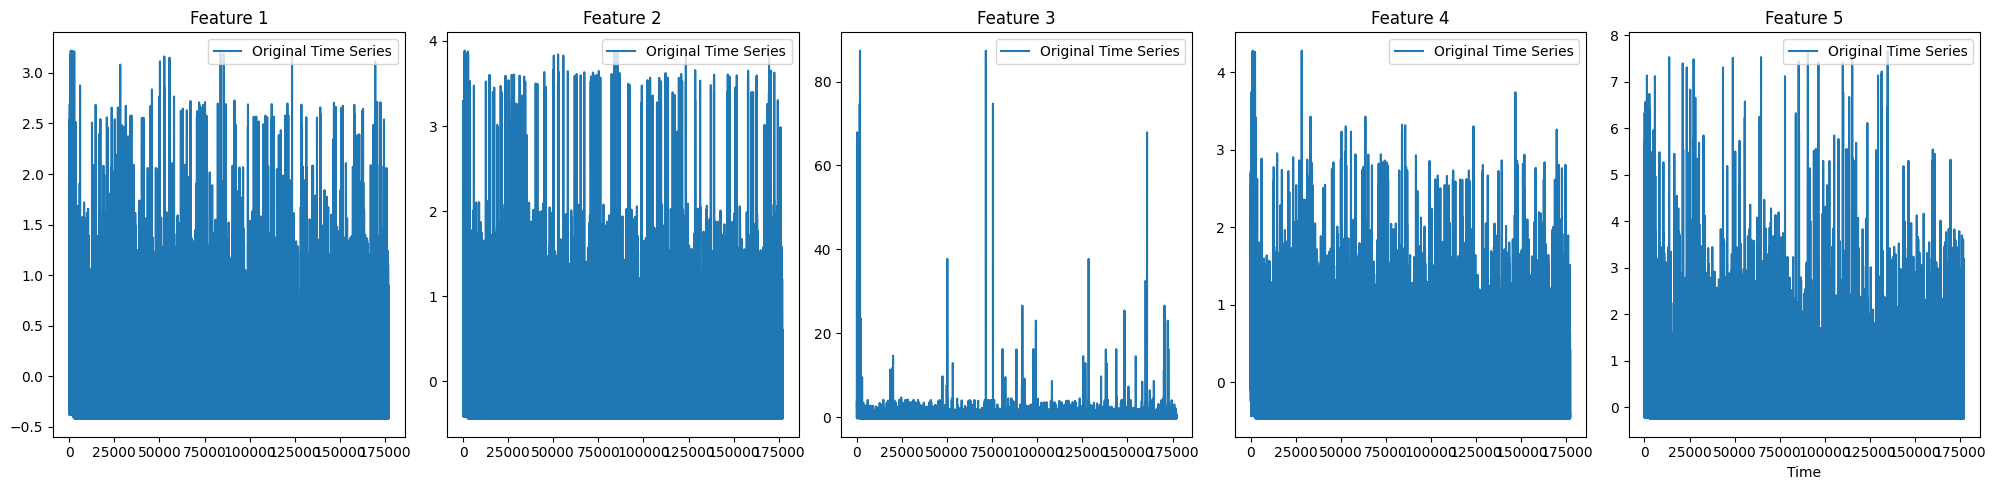

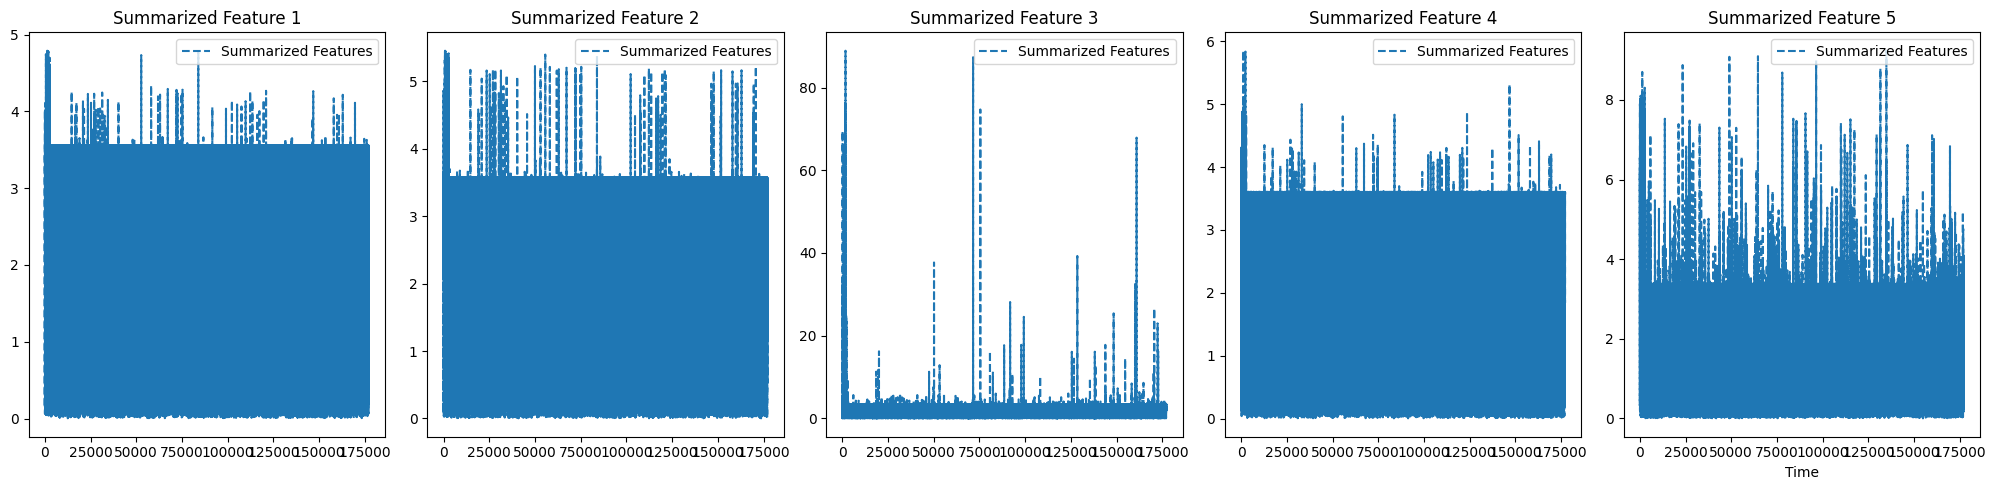

In [296]:
amplitudes, phases = compute_dft_amplitude_phase(downsampled_p2_X)
param_p2 = summarize_amplitude_phase(amplitudes, phases)
print("Original shape:", downsampled_p2_X.shape)  # Should be (2508, 60, 5)
print("Summarized shape:", param_p2.shape)  # Should be (2508, 60, 5)
visualize_time_series_and_spectrum(downsampled_p2_X, param_p2)


### test on partition 2 parameterized

In [297]:
# Predict on the test data
predictions = rf.predict(param_p2)

conf_matrix = confusion_matrix(downsampled_p2_y, predictions)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# True Skill Statistic (TSS)
tss_param_p2 = (tp / (tp + fn)) - (fp / (fp + tn))

# Heidke Skill Score (HSS)
hss_param_lossy_p2 = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
print(classification_report(downsampled_p2_y, predictions))
print(f"TSS: {tss_param_p2:.2f}")
print(f"HSS: {hss_param_lossy_p2:.2f}")

              precision    recall  f1-score   support

          FL       0.09      0.84      0.17      1401
          NF       1.00      0.87      0.93     87156

    accuracy                           0.87     88557
   macro avg       0.55      0.86      0.55     88557
weighted avg       0.98      0.87      0.92     88557

TSS: 0.71
HSS: 0.15


### test on partition 3 parameterized

Original shape: (42510, 2, 5)
Summarized shape: (42510, 2, 5)


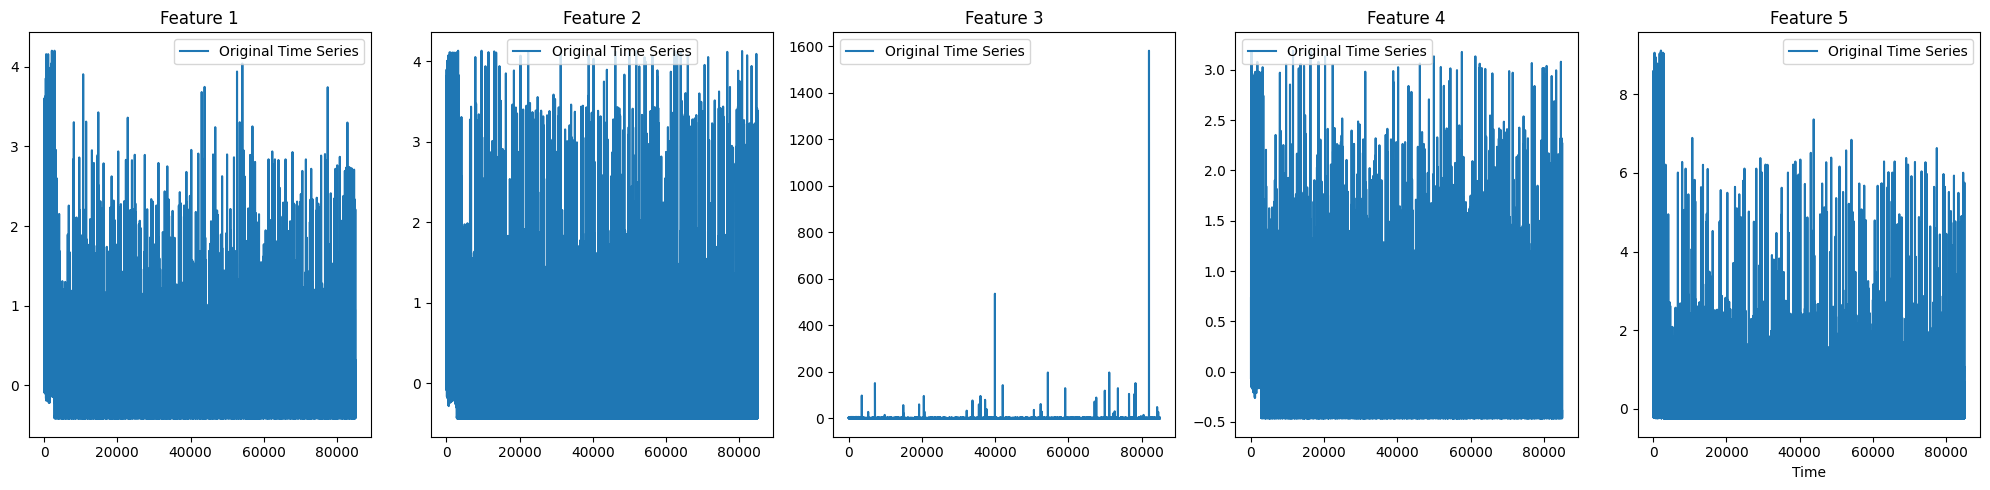

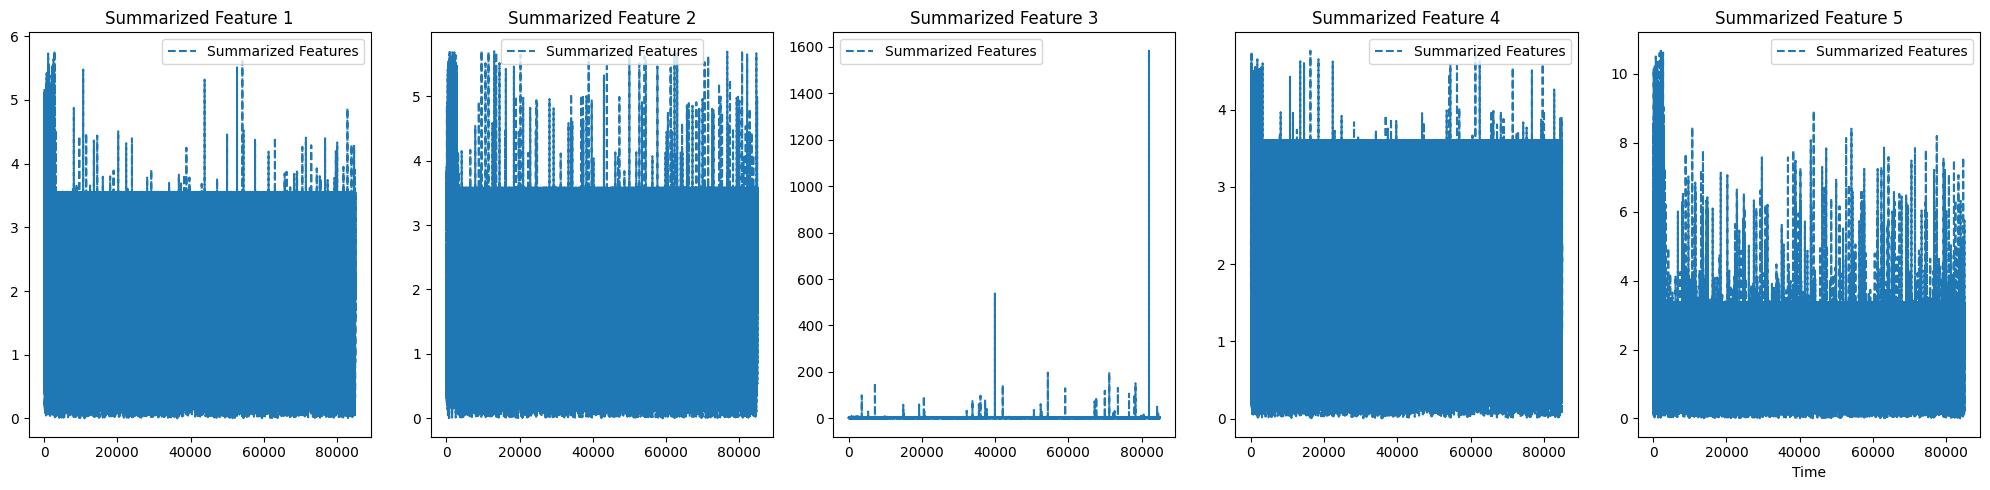

In [298]:
amplitudes, phases = compute_dft_amplitude_phase(downsampled_p3_X)
param_p3 = summarize_amplitude_phase(amplitudes, phases)
print("Original shape:", downsampled_p3_X.shape)  # Should be (2508, 60, 5)
print("Summarized shape:", param_p3.shape)  # Should be (2508, 60, 5)
visualize_time_series_and_spectrum(downsampled_p3_X, param_p3)


In [299]:
# Predict on the test data
predictions = rf.predict(param_p3)

conf_matrix = confusion_matrix(downsampled_p3_y, predictions)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# True Skill Statistic (TSS)
tss_param_p3 = (tp / (tp + fn)) - (fp / (fp + tn))

# Heidke Skill Score (HSS)
hss_param_p3 = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
print(classification_report(downsampled_p3_y, predictions))
print(f"TSS: {tss_param_p3:.2f}")
print(f"HSS: {hss_param_p3:.2f}")

              precision    recall  f1-score   support

          FL       0.15      0.85      0.26      1424
          NF       0.99      0.84      0.91     41086

    accuracy                           0.84     42510
   macro avg       0.57      0.84      0.58     42510
weighted avg       0.97      0.84      0.89     42510

TSS: 0.68
HSS: 0.22


### test on partition 4 parameterized

Original shape: (51261, 2, 5)
Summarized shape: (51261, 2, 5)


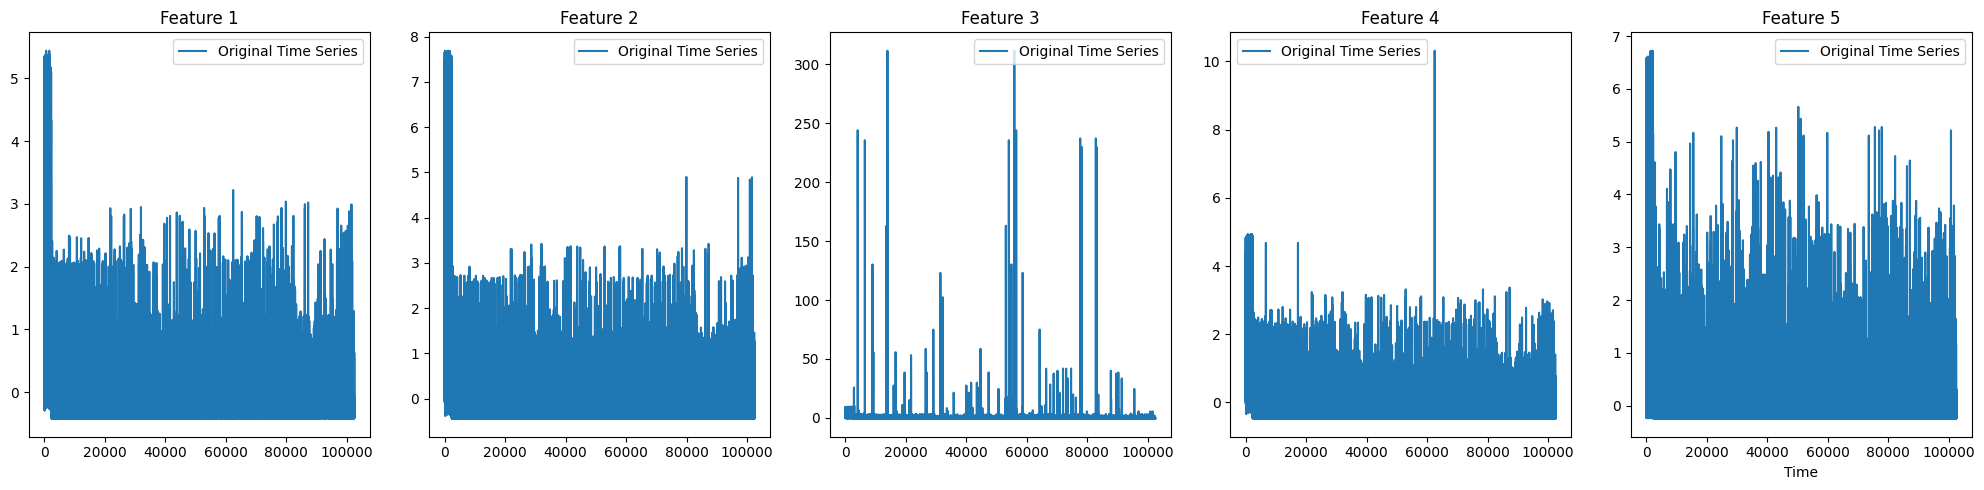

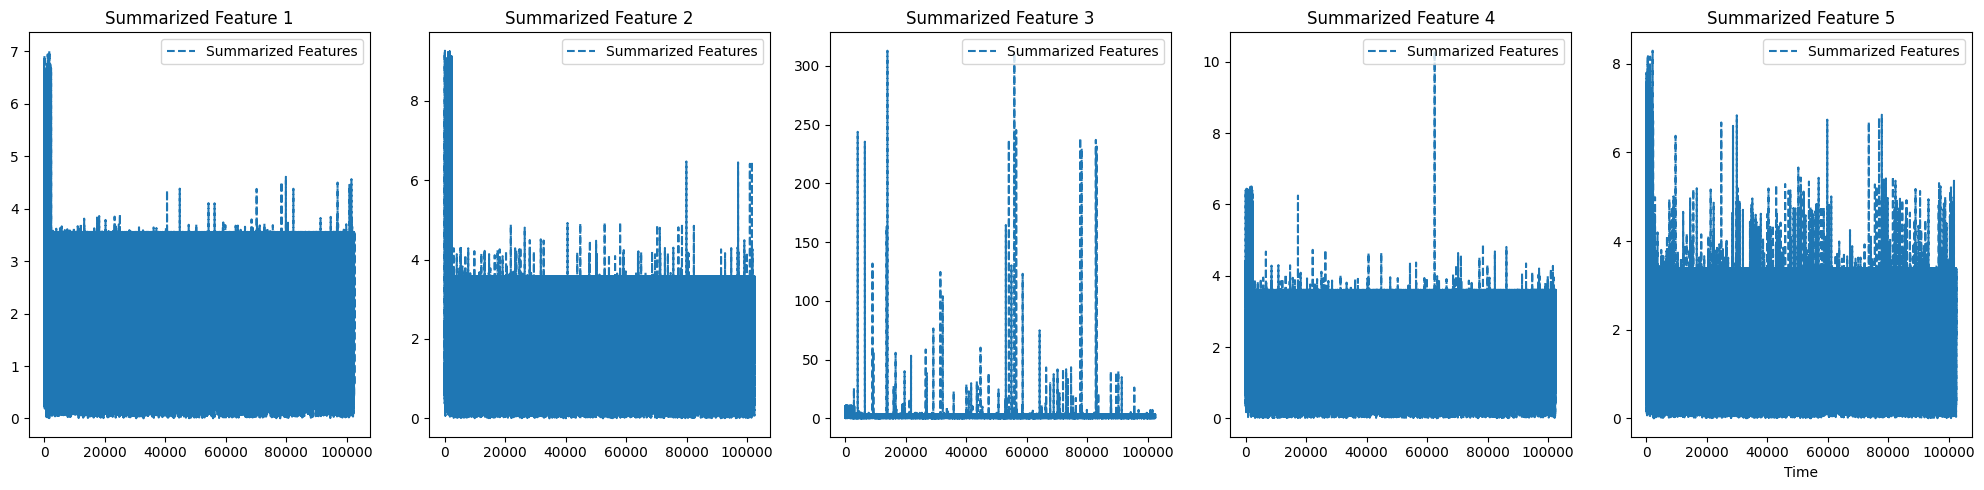

In [300]:
amplitudes, phases = compute_dft_amplitude_phase(downsampled_p4_X)
param_p4 = summarize_amplitude_phase(amplitudes, phases)
print("Original shape:", downsampled_p4_X.shape)  # Should be (2508, 60, 5)
print("Summarized shape:", param_p4.shape)  # Should be (2508, 60, 5)
visualize_time_series_and_spectrum(downsampled_p4_X, param_p4)


In [301]:
# Predict on the test data
predictions = rf.predict(downsampled_p4_X)

conf_matrix = confusion_matrix(downsampled_p4_y, predictions)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# True Skill Statistic (TSS)
tss_param_p4 = (tp / (tp + fn)) - (fp / (fp + tn))

# Heidke Skill Score (HSS)
hss_param_p4 = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
print(classification_report(downsampled_p4_y, predictions))
print(f"TSS: {tss_param_p4:.2f}")
print(f"HSS: {hss_param_p4:.2f}")

              precision    recall  f1-score   support

          FL       0.02      0.86      0.04      1165
          NF       0.87      0.02      0.04     50096

    accuracy                           0.04     51261
   macro avg       0.45      0.44      0.04     51261
weighted avg       0.85      0.04      0.04     51261

TSS: -0.12
HSS: -0.01


### test on partition 5 parameterized

Original shape: (75365, 2, 5)
Summarized shape: (75365, 2, 5)


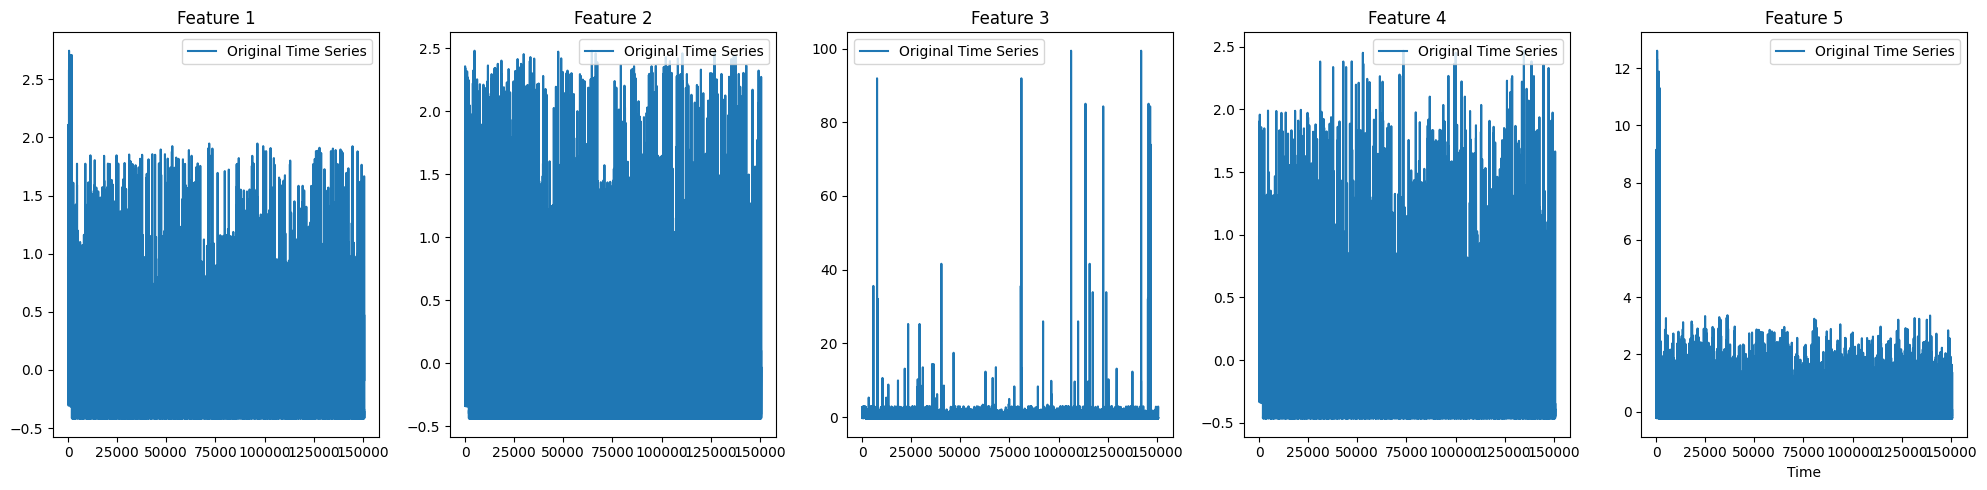

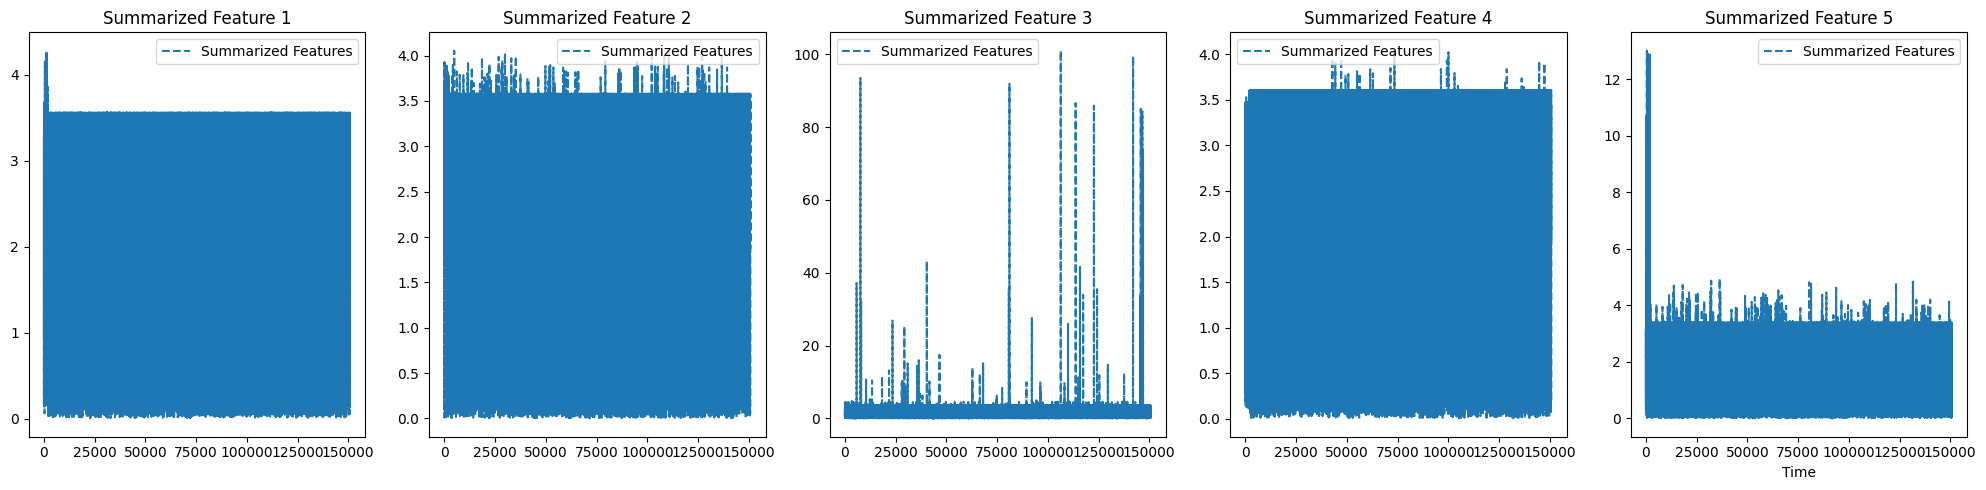

In [302]:
amplitudes, phases = compute_dft_amplitude_phase(downsampled_p5_X)
param_p5 = summarize_amplitude_phase(amplitudes, phases)
print("Original shape:", downsampled_p5_X.shape)  # Should be (2508, 60, 5)
print("Summarized shape:", param_p5.shape)  # Should be (2508, 60, 5)
visualize_time_series_and_spectrum(downsampled_p5_X, param_p5)


In [303]:
# Predict on the test data
predictions = rf.predict(downsampled_p5_X)

conf_matrix = confusion_matrix(downsampled_p5_y, predictions)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# True Skill Statistic (TSS)
tss_param_p5 = (tp / (tp + fn)) - (fp / (fp + tn))

# Heidke Skill Score (HSS)
hss_param_p5 = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
print(classification_report(downsampled_p5_y, predictions))
print(f"TSS: {tss_param_p5:.2f}")
print(f"HSS: {hss_param_p5:.2f}")

              precision    recall  f1-score   support

          FL       0.01      0.87      0.02       990
          NF       0.93      0.02      0.04     74375

    accuracy                           0.03     75365
   macro avg       0.47      0.45      0.03     75365
weighted avg       0.92      0.03      0.04     75365

TSS: -0.10
HSS: -0.00


# DOWNSAMPLING

In [91]:
# Define custom scoring functions for TSS and HSS
def true_skill_statistic(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tss = (tp / (tp + fn)) - (fp / (fp + tn))
    return tss

# Heidke Skill Score function
def heidke_skill_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    numerator = 2 * ((tp * tn) - (fp * fn))
    denominator = (tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)
    hss = numerator / denominator
    return hss

# Function to minimize (negative HSS) with cross-validation
def gb_hss_cv(params, X, y, random_state=None, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    hss_scores = []
    
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        params = {
            'n_estimators': int(params['n_estimators']),
            'max_depth': int(params['max_depth']),
            'min_samples_split': int(params['min_samples_split']),
            'min_samples_leaf': int(params['min_samples_leaf'])
        }
        
        # Initialize the model with the current hyperparameters
        model = MultivariateClassifier(TimeSeriesForest(random_state=random_state, **params))
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on validation set and calculate HSS
        y_pred = model.predict(X_val)
        hss = heidke_skill_score(y_val, y_pred)
        hss_scores.append(hss)
    
    # Return the negative mean HSS (to minimize using fmin)
    return -np.mean(hss_scores)

# Possible values of hyperparameters
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 250, 50),
    'max_depth': hp.quniform('max_depth', 2, 20, 2),
    'min_samples_split': hp.quniform('min_samples_split', 1, 5, 2),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 5, 2)
}

%%time 
# n_samples, n_timestamps, n_channels = X_norm_part1.shape
# X_reshaped = X_norm_part1.reshape(n_samples, n_timestamps * n_channels)

# Trials will contain logging information
trials = Trials()

# Run the optimization
best = fmin(
    fn=lambda params: gb_hss(params, random_state=42, X=X_norm_part1, y=y_norm_part1), # Function to optimize
    space=space, 
    algo=anneal.suggest, # Optimization algorithm
    max_evals=50, # Maximum number of iterations
    trials=trials, # Logging
    rstate=np.random.default_rng(42) # Fixing random state for reproducibility
    
)

# Fit the final model with the best hyperparameters found
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    'min_samples_split': int(best['min_samples_split']),
    'min_samples_leaf': int(best['min_samples_leaf'])
}

final_model = MultivariateClassifier(TimeSeriesForest(random_state=42, **best_params))
final_model.fit(X_norm_part1, y_norm_part1)

# Compute the score on the training set (using a single fold for brevity)
train_score = gb_hss_cv(best_params, X_norm_part1, y_norm_part1, random_state=42, n_splits=1)  # or use the actual training set for a better estimate

print("Best HSS on training set: {:.3f} with params: {}".format(-train_score, best))

UsageError: Line magic function `%%time` not found.


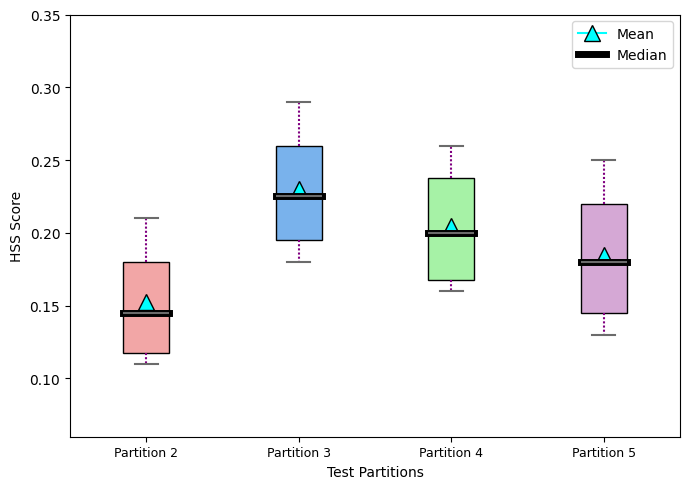

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # TSS scores for each partition from the four experiments
# tss_data = {
#     'Partition 2': [0.81, 0.74, 0.72, 0.72],
#     'Partition 3': [0.77, 0.69, 0.68, 0.68],
#     'Partition 4': [0.82, 0.74, 0.72, 0.72],
#     'Partition 5': [0.87, 0.77, 0.77, 0.77],
# }
# TSS scores for each partition from the four experiments
# tss_data = {
#     'Partition 2': [0.79, 0.78, 0.77, 0.71],
#     'Partition 3': [0.79, 0.75, 0.75, 0.68],
#     'Partition 4': [0.83, 0.80, 0.80, 0.73],
#     'Partition 5': [0.86, 0.85, 0.84, 0.76],
# }
# tss_data = {
#     'Partition 2': [0.15, 0.21, 0.21, 0.21],
#     'Partition 3': [0.22, 0.29, 0.29, 0.29],
#     'Partition 4': [0.20, 0.26, 0.26, 0.26],
#     'Partition 5': [0.18, 0.26, 0.27, 0.26],
# }
tss_data = {
    'Partition 2': [0.17, 0.12, 0.11, 0.21],
    'Partition 3': [0.25, 0.20, 0.18, 0.29],
    'Partition 4': [0.23, 0.17, 0.16, 0.26],
    'Partition 5': [0.21, 0.15, 0.13, 0.25],
}
# Custom colors for each boxplot
colors = ['#FF9999', '#66B2FF', '#99FF99', 'plum']  # Light red, blue, green, and plum

# Extracting partition names and TSS values
partition_names = list(tss_data.keys())
tss_values = list(tss_data.values())

# Create a boxplot with custom colors
plt.figure(figsize=(7, 5))
box_plot = sns.boxplot(
    data=tss_values,
    showmeans=False,  # Don't show the mean automatically
    meanline=False,
    boxprops={'edgecolor': 'black', 'linewidth': 1},  # Ensure black border for IQR
    width=0.3,  # Reduce box width
    palette=colors,  # Apply custom colors
    whiskerprops={'linestyle': '--', 'color': 'purple', 'linewidth': 1.5, 'dashes': (1, 1)}  # Custom whisker design
)

# Add labels and title
# plt.title('Boxplot of TSS Values across Test Partitions for TS Data', fontsize=12)
plt.xlabel('Test Partitions', fontsize=10)
plt.ylabel('HSS Score', fontsize=10)
plt.xticks(range(len(partition_names)), partition_names, fontsize=9)
plt.ylim(0.06,0.35)
# Calculate mean and median for each partition
for i in range(len(tss_values)):
    median = np.median(tss_values[i])
    mean = np.mean(tss_values[i])
    
    # Plot filled triangle for mean
    plt.plot(i, mean, marker='^', color='cyan', markeredgecolor='black', markersize=12, label='Mean' if i == 0 else "")
    
    # Plot thick horizontal line for median
    plt.plot([i - 0.15, i + 0.15], [median, median], color='black', linewidth=5, label='Median' if i == 0 else "")

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


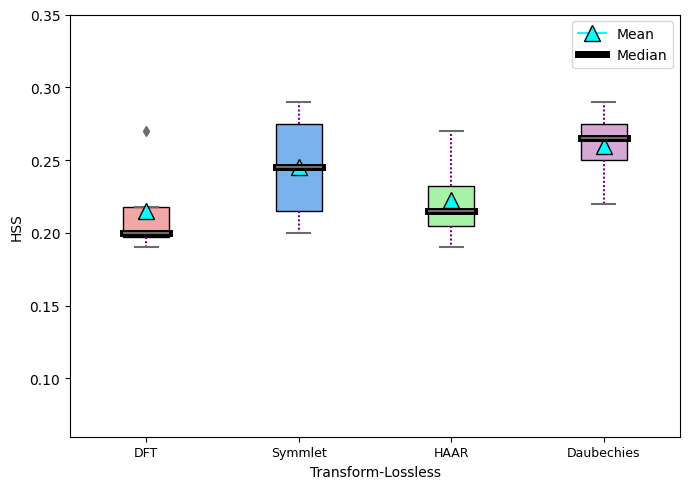

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # TSS scores for each partition from the four experiments
# tss_data = {
#     'Partition 2': [0.81, 0.74, 0.72, 0.72],
#     'Partition 3': [0.77, 0.69, 0.68, 0.68],
#     'Partition 4': [0.82, 0.74, 0.72, 0.72],
#     'Partition 5': [0.87, 0.77, 0.77, 0.77],
# }
# TSS scores for each partition from the four experiments
# tss_data = {
#     'Partition 2': [0.79, 0.78, 0.77, 0.71],
#     'Partition 3': [0.79, 0.75, 0.75, 0.68],
#     'Partition 4': [0.83, 0.80, 0.80, 0.73],
#     'Partition 5': [0.86, 0.85, 0.84, 0.76],
# }
# tss_data = {
#     'Partition 2': [0.15, 0.21, 0.21, 0.21],
#     'Partition 3': [0.22, 0.29, 0.29, 0.29],
#     'Partition 4': [0.20, 0.26, 0.26, 0.26],
#     'Partition 5': [0.18, 0.26, 0.27, 0.26],
# }

#lossy reconstruction-tss
# tss_data = {      
#     'DFT': [0.89, 0.82, 0.86, 0.90],
#     'Symmlet': [0.74, 0.72, 0.74, 0.75],
#     'HAAR': [0.80, 0.79, 0.75, 0.78],
#     'Daubechies': [0.73, 0.71, 0.73, 0.76],
# }
# #lossy reconstruction-hss
# tss_data = {      
#     'DFT': [0.25, 0.24, 0.23, 0.25],
#     'Symmlet': [0.21, 0.29, 0.25, 0.25],
#     'HAAR': [0.18, 0.25, 0.20, 0.20],
#     'Daubechies': [0.21, 0.29, 0.26, 0.26],
# }
# #lossless reconstruction-tss
# tss_data = {      
#     'DFT': [0.80, 0.79, 0.76, 0.80],
#     'Symmlet': [0.74, 0.69, 0.72, 0.76],
#     'HAAR': [0.78, 0.77, 0.75, 0.80],
#     'Daubechies': [0.74, 0.69, 0.72, 0.77],
# }
#lossless reconstruction-hss
tss_data = {      
    'DFT': [0.19, 0.27, 0.2, 0.20],
    'Symmlet': [0.22, 0.29, 0.20, 0.27],
    'HAAR': [0.19, 0.27, 0.22, 0.21],
    'Daubechies': [0.22, 0.29, 0.26, 0.27],
}
# Custom colors for each boxplot
colors = ['#FF9999', '#66B2FF', '#99FF99', 'plum']  # Light red, blue, green, and plum

# Extracting partition names and TSS values
transform_names = list(tss_data.keys())
tss_values = list(tss_data.values())

# Create a boxplot with custom colors
plt.figure(figsize=(7, 5))
box_plot = sns.boxplot(
    data=tss_values,
    showmeans=False,  # Don't show the mean automatically
    meanline=False,
    boxprops={'edgecolor': 'black', 'linewidth': 1},  # Ensure black border for IQR
    width=0.3,  # Reduce box width
    palette=colors,  # Apply custom colors
    whiskerprops={'linestyle': '--', 'color': 'purple', 'linewidth': 1.5, 'dashes': (1, 1)}  # Custom whisker design
)

# Add labels and title
# plt.title('Boxplot of TSS Values across Test Partitions for TS Data', fontsize=12)
plt.xlabel('Transform-Lossless', fontsize=10)
plt.ylabel('HSS', fontsize=10)
plt.xticks(range(len(transform_names)), transform_names, fontsize=9)
# plt.ylim(0.65,0.95)
plt.ylim(0.06,0.35)
# Calculate mean and median for each partition
for i in range(len(tss_values)):
    median = np.median(tss_values[i])
    mean = np.mean(tss_values[i])
    
    # Plot filled triangle for mean
    plt.plot(i, mean, marker='^', color='cyan', markeredgecolor='black', markersize=12, label='Mean' if i == 0 else "")
    
    # Plot thick horizontal line for median
    plt.plot([i - 0.15, i + 0.15], [median, median], color='black', linewidth=5, label='Median' if i == 0 else "")

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


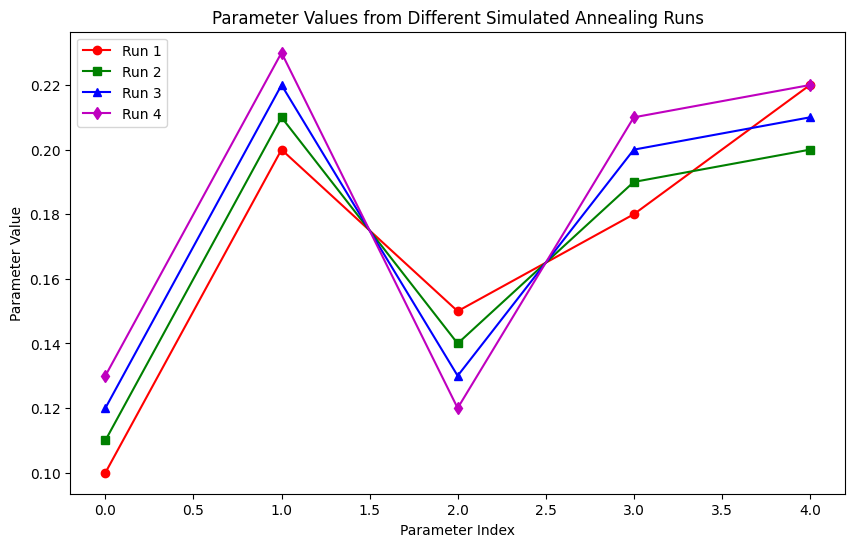

In [122]:
import matplotlib.pyplot as plt

# Example data: Replace these with your actual data
# Assuming each parameter set is a list of values
param_values_run1 = [0.1, 0.2, 0.15, 0.18, 0.22]
param_values_run2 = [0.11, 0.21, 0.14, 0.19, 0.20]
param_values_run3 = [0.12, 0.22, 0.13, 0.20, 0.21]
param_values_run4 = [0.13, 0.23, 0.12, 0.21, 0.22]

# X-axis (e.g., parameter indices)
x = range(len(param_values_run1))

plt.figure(figsize=(10, 6))

# Plot each run's data
plt.plot(x, param_values_run1, marker='o', linestyle='-', color='r', label='Run 1')
plt.plot(x, param_values_run2, marker='s', linestyle='-', color='g', label='Run 2')
plt.plot(x, param_values_run3, marker='^', linestyle='-', color='b', label='Run 3')
plt.plot(x, param_values_run4, marker='d', linestyle='-', color='m', label='Run 4')

# Add labels and title
plt.xlabel('Parameter Index')
plt.ylabel('Parameter Value')
plt.title('Parameter Values from Different Simulated Annealing Runs')
plt.legend()

# Show the plot
plt.show()


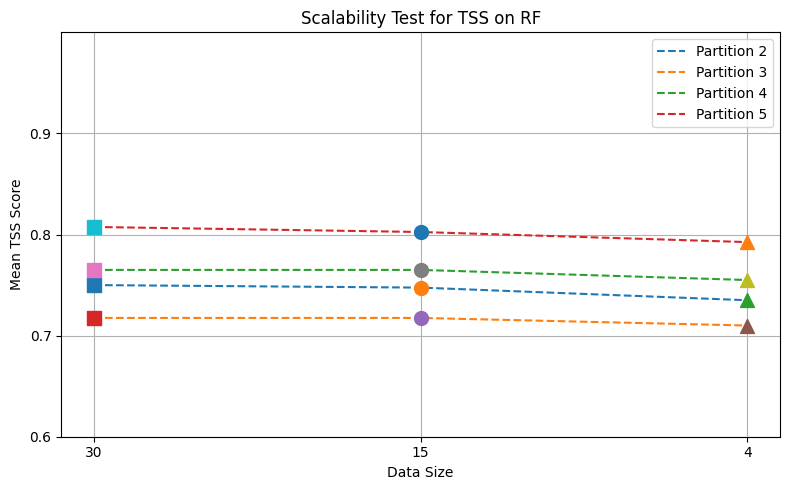

In [161]:
import matplotlib.pyplot as plt
import numpy as np

# Example actual scores array: Replace this with your actual scores
# Shape should be (num_partitions, num_data_sizes, num_runs)
scores = np.array([
    [[0.74, 0.78, 0.77, 0.71], [0.72, 0.78, 0.77, 0.72], [0.71, 0.74, 0.77, 0.72]],  # Partition 2
    [[0.69, 0.75, 0.75, 0.68], [0.68, 0.75, 0.76, 0.68], [0.69, 0.73, 0.75, 0.67]],  # Partition 3
    [[0.73, 0.80, 0.80, 0.73], [0.73, 0.80, 0.80, 0.73], [0.73, 0.77, 0.79, 0.73]],  # Partition 4
    [[0.78, 0.85, 0.84, 0.76], [0.77, 0.83, 0.84, 0.77], [0.76, 0.80, 0.84, 0.77]]   # Partition 5
])

# Compute average scores over the runs
average_scores = np.mean(scores[:, :, :], axis=2)

# Exclude Partition 1 (index 0) - Now we have 4 partitions left (indices 0 to 3)
partitions_to_plot = range(4)  # This corresponds to Partition 2 through Partition 5

# Data size labels
data_size_labels = ['30', '15', '4']

# Markers for each data size
markers = ['s', 'o', '^']  # Square for '30', Circle for '15', Triangle for '4'

# Plot
plt.figure(figsize=(8, 5))

for partition in partitions_to_plot:
    plt.plot(data_size_labels, average_scores[partition, :], linestyle='--', label=f'Partition {partition + 2}')
    for i, data_size in enumerate(data_size_labels):
        plt.scatter(data_size, average_scores[partition, i], marker=markers[i], s=100, zorder=3)

# Set y-axis limits
plt.ylim(0.60, 1.0)

# Set y-axis ticks at intervals of 0.1
plt.yticks(np.arange(0.60, 1.00, 0.1))

plt.xlabel('Data Size')
plt.ylabel('Mean TSS Score')
plt.title('Scalability Test for TSS on RF')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### TSS Plot for ts and non-ts side by side

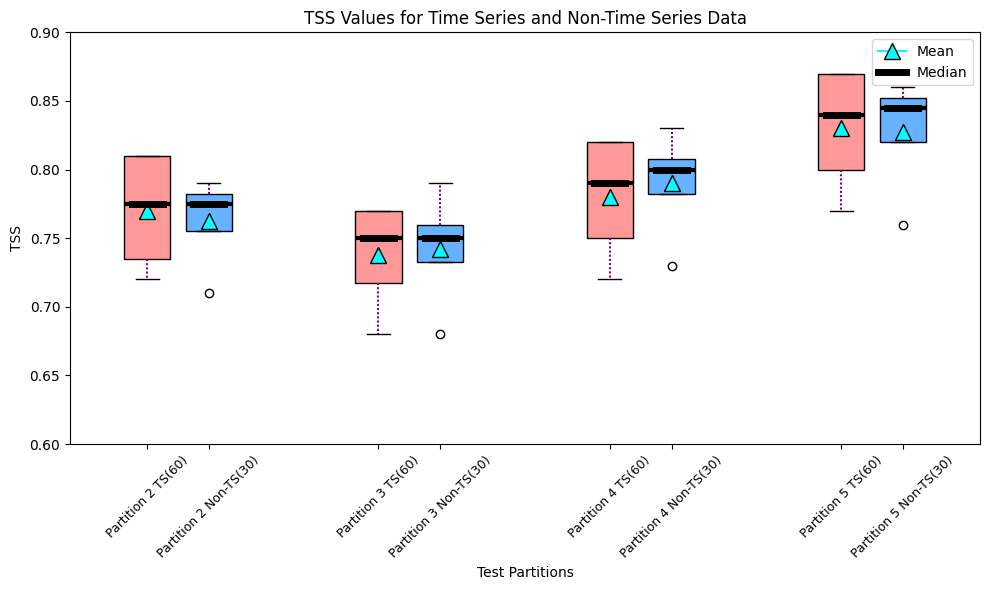

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# TSS scores for each partition from the four experiments (time series data)
ts_tss_data = {
    'Partition 2': [0.81, 0.74, 0.81, 0.72],
    'Partition 3': [0.77, 0.73, 0.77, 0.68],
    'Partition 4': [0.82, 0.76, 0.82, 0.72],
    'Partition 5': [0.87, 0.81, 0.87, 0.77],
}

# TSS scores for each partition from the four experiments (non-time series data)
non_ts_tss_data = {
    'Partition 2': [0.79, 0.78, 0.77, 0.71],
    'Partition 3': [0.79, 0.75, 0.75, 0.68],
    'Partition 4': [0.83, 0.80, 0.80, 0.73],
    'Partition 5': [0.86, 0.85, 0.84, 0.76],
}
    

# Extract partition names and TSS values for both time series and non-time series data
partition_names = list(ts_tss_data.keys())
ts_values = list(ts_tss_data.values())
non_ts_values = list(non_ts_tss_data.values())

# Combine both time series and non-time series data for plotting
all_data = []
positions = []  # Custom positions for the boxplots
labels = []

# Set the base spacing and closeness between pairs of boxplots
base_position = 1
spacing = 1.5  # Larger space between partitions
closeness = 0.4  # Closer space between TS and Non-TS for the same partition

for i, partition in enumerate(partition_names):
    all_data.append(ts_values[i])
    all_data.append(non_ts_values[i])
    
    # Set positions: TS and Non-TS for the same partition closer together
    positions.append(base_position)
    positions.append(base_position + closeness)
    
    # Labels for x-axis
    labels.append(f'{partition} TS(60)')
    labels.append(f'{partition} Non-TS(30)')
    
    # Update base position for the next partition (space between partitions)
    base_position += spacing

# Custom colors for each boxplot
colors = ['#FF9999', '#66B2FF'] * len(partition_names)  # Alternate between TS and Non-TS colors

# Create the boxplot using matplotlib's boxplot function
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(
    all_data, 
    positions=positions, 
    widths=0.3,  # Set width for the boxes
    patch_artist=True,  # Allows setting colors
    boxprops={'edgecolor': 'black', 'linewidth': 1},  # Black border for boxes
    whiskerprops={'linestyle': '--', 'color': 'purple', 'linewidth': 1.5, 'dashes': (1, 1)},  # Custom whisker design
    medianprops={'color': 'black', 'linewidth': 3}  # Custom median line design
)

# Set box colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.title('TSS Values for Time Series and Non-Time Series Data', fontsize=12)
plt.xlabel('Test Partitions', fontsize=10)
plt.ylabel('TSS', fontsize=10)
plt.xticks(positions, labels, fontsize=9, rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0.6, 0.9)

# Calculate mean and median for each partition
for i in range(len(all_data)):
    median = np.median(all_data[i])
    mean = np.mean(all_data[i])
    
    # Plot filled triangle for mean
    plt.plot(positions[i], mean, marker='^', color='cyan', markeredgecolor='black', markersize=12, label='Mean' if i == 0 else "")
    
    # Plot thick horizontal line for median
    plt.plot([positions[i] - 0.1, positions[i] + 0.1], [median, median], color='black', linewidth=5, label='Median' if i == 0 else "")

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


### HSS Plot for ts and non-ts side by side

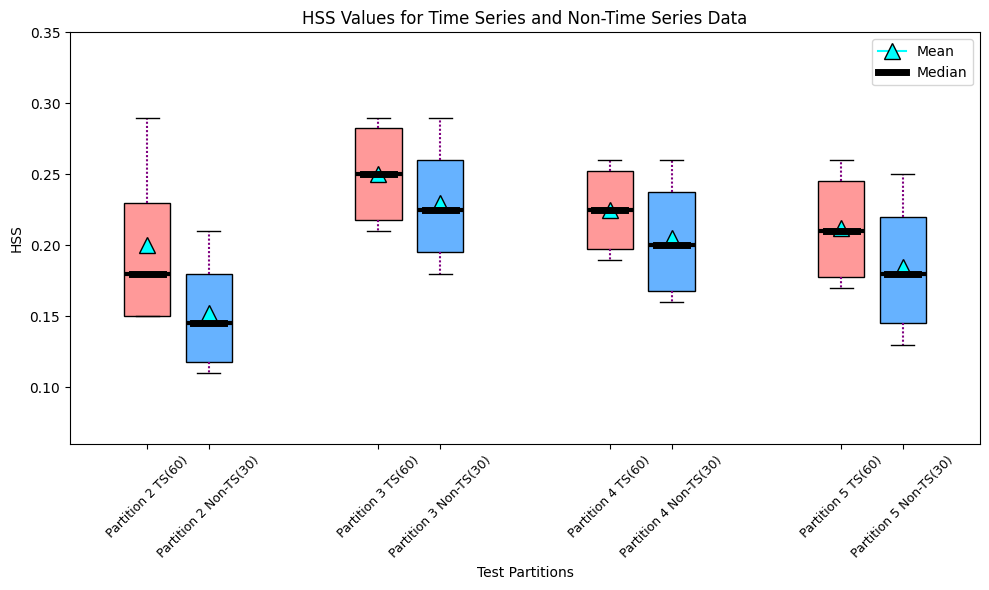

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# HSS scores for each partition from the four experiments (time series data)
ts_hss_data = {
    'Partition 2': [0.15, 0.29, 0.15, 0.21],
    'Partition 3': [0.22, 0.28, 0.21, 0.29],
    'Partition 4': [0.20, 0.25, 0.19, 0.26],
    'Partition 5': [0.18, 0.24, 0.17, 0.26],
}

# HSS scores for each partition from the four experiments (non-time series data)
non_ts_hss_data = {
    'Partition 2': [0.17, 0.12, 0.11, 0.21],
    'Partition 3': [0.25, 0.20, 0.18, 0.29],
    'Partition 4': [0.23, 0.17, 0.16, 0.26],
    'Partition 5': [0.21, 0.15, 0.13, 0.25],
}

# Extract partition names and HSS values for both time series and non-time series data
partition_names = list(ts_hss_data.keys())
ts_values = list(ts_hss_data.values())
non_ts_values = list(non_ts_hss_data.values())

# Combine both time series and non-time series data for plotting
all_data = []
positions = []  # Custom positions for the boxplots
labels = []

# Set the base spacing and closeness between pairs of boxplots
base_position = 1
spacing = 1.5  # Larger space between partitions
closeness = 0.4  # Closer space between TS and Non-TS for the same partition

for i, partition in enumerate(partition_names):
    all_data.append(ts_values[i])
    all_data.append(non_ts_values[i])
    
    # Set positions: TS and Non-TS for the same partition closer together
    positions.append(base_position)
    positions.append(base_position + closeness)
    
    # Labels for x-axis
    labels.append(f'{partition} TS(60)')
    labels.append(f'{partition} Non-TS(30)')
    
    # Update base position for the next partition (space between partitions)
    base_position += spacing

# Custom colors for each boxplot
colors = ['#FF9999', '#66B2FF'] * len(partition_names)  # Alternate between TS and Non-TS colors

# Create the boxplot using matplotlib's boxplot function
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(
    all_data, 
    positions=positions, 
    widths=0.3,  # Set width for the boxes
    patch_artist=True,  # Allows setting colors
    boxprops={'edgecolor': 'black', 'linewidth': 1},  # Black border for boxes
    whiskerprops={'linestyle': '--', 'color': 'purple', 'linewidth': 1.5, 'dashes': (1, 1)},  # Custom whisker design
    medianprops={'color': 'black', 'linewidth': 3}  # Custom median line design
)

# Set box colors
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
plt.title('HSS Values for Time Series and Non-Time Series Data', fontsize=12)
plt.xlabel('Test Partitions', fontsize=10)
plt.ylabel('HSS', fontsize=10)
plt.xticks(positions, labels, fontsize=9, rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0.06,0.35)

# Calculate mean and median for each partition
for i in range(len(all_data)):
    median = np.median(all_data[i])
    mean = np.mean(all_data[i])
    
    # Plot filled triangle for mean
    plt.plot(positions[i], mean, marker='^', color='cyan', markeredgecolor='black', markersize=12, label='Mean' if i == 0 else "")
    
    # Plot thick horizontal line for median
    plt.plot([positions[i] - 0.1, positions[i] + 0.1], [median, median], color='black', linewidth=5, label='Median' if i == 0 else "")

# Add legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to fit labels and title
plt.show()


### lossy vs lossless for different partitions across different dimensions

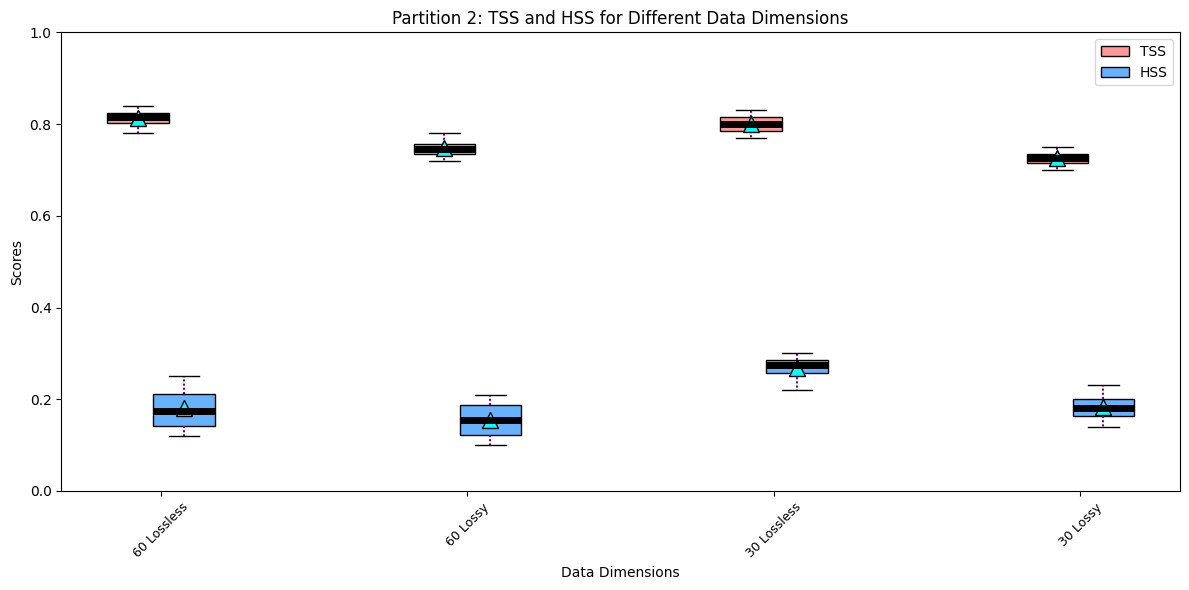

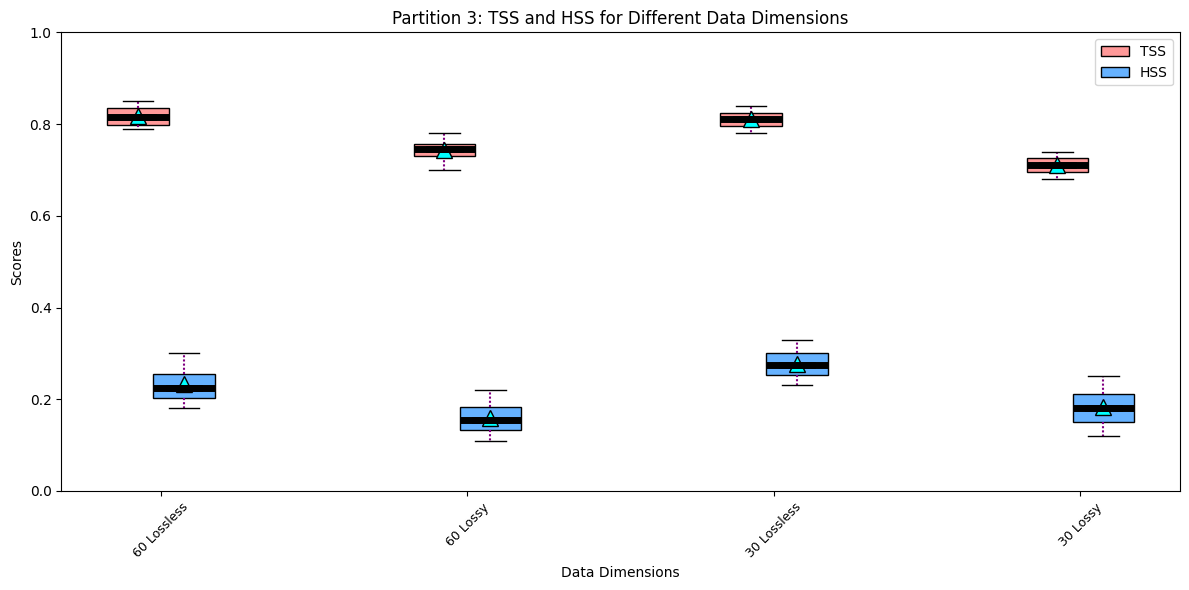

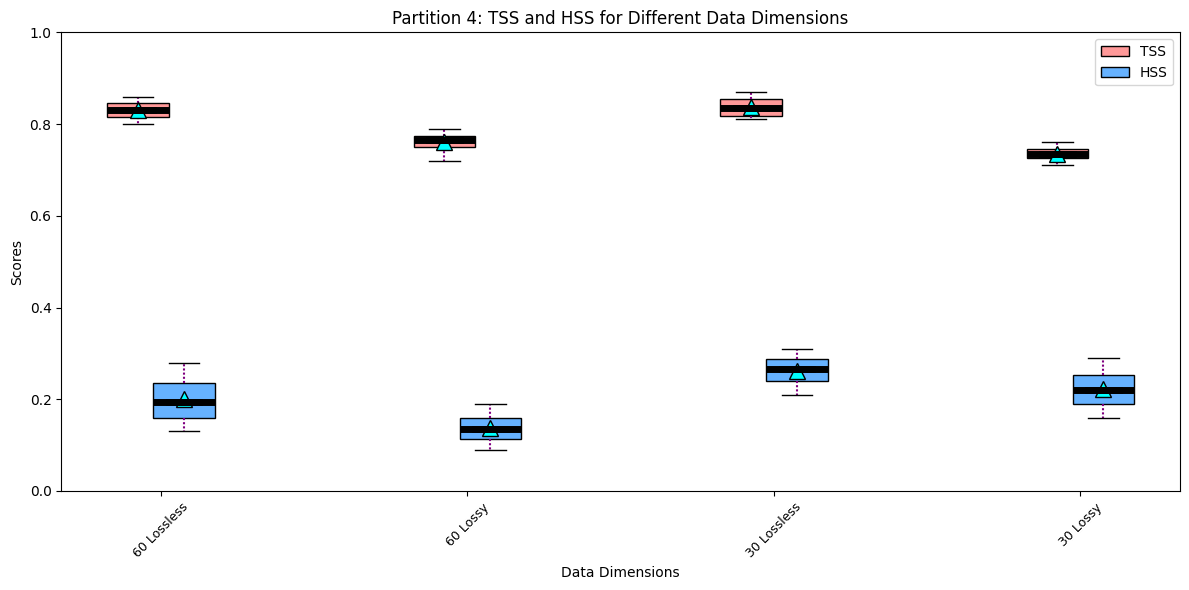

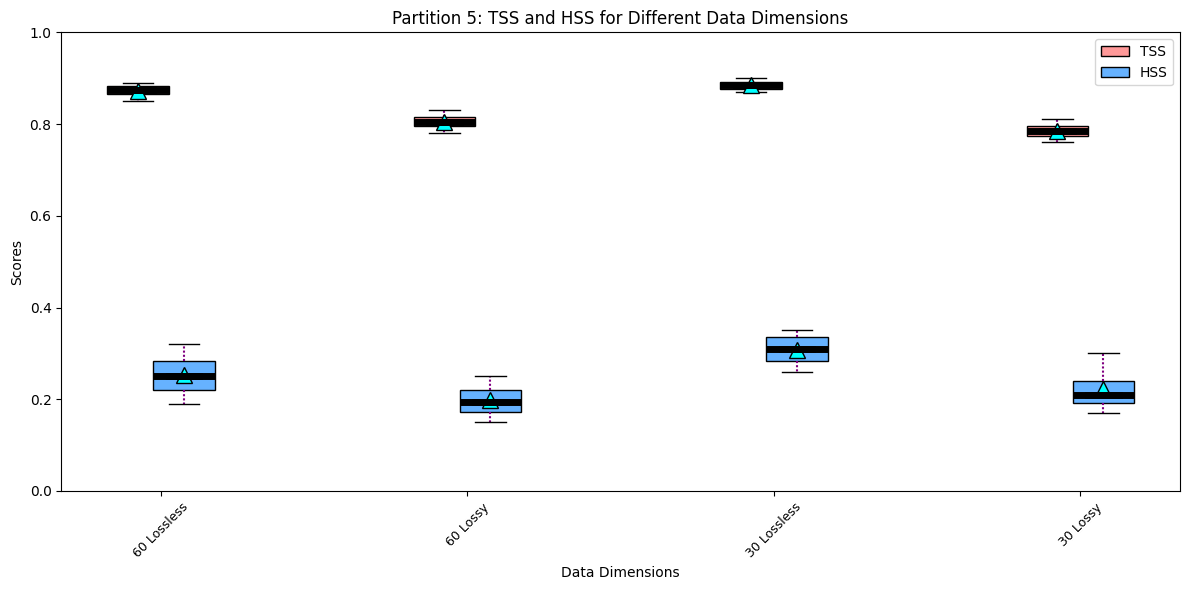

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Predefined TSS and HSS scores for each partition (sample values)
tss_data = {
    'Partition 2': {
        '60 Lossless': [0.81, 0.78, 0.84, 0.82],
        '60 Lossy': [0.75, 0.72, 0.78, 0.74],
        '30 Lossless': [0.83, 0.79, 0.81, 0.77],
        '30 Lossy': [0.72, 0.70, 0.75, 0.73]
    },
    'Partition 3': {
        '60 Lossless': [0.80, 0.79, 0.85, 0.83],
        '60 Lossy': [0.74, 0.70, 0.78, 0.75],
        '30 Lossless': [0.82, 0.78, 0.84, 0.80],
        '30 Lossy': [0.70, 0.68, 0.74, 0.72]
    },
    'Partition 4': {
        '60 Lossless': [0.82, 0.80, 0.86, 0.84],
        '60 Lossy': [0.76, 0.72, 0.79, 0.77],
        '30 Lossless': [0.85, 0.81, 0.87, 0.82],
        '30 Lossy': [0.73, 0.71, 0.76, 0.74]
    },
    'Partition 5': {
        '60 Lossless': [0.87, 0.85, 0.89, 0.88],
        '60 Lossy': [0.80, 0.78, 0.83, 0.81],
        '30 Lossless': [0.89, 0.87, 0.90, 0.88],
        '30 Lossy': [0.78, 0.76, 0.81, 0.79]
    }
}

# HSS data (between 0.09 and 0.35)
hss_data = {
    'Partition 2': {
        '60 Lossless': [0.12, 0.15, 0.20, 0.25],
        '60 Lossy': [0.10, 0.13, 0.18, 0.21],
        '30 Lossless': [0.22, 0.27, 0.30, 0.28],
        '30 Lossy': [0.14, 0.19, 0.23, 0.17]
    },
    'Partition 3': {
        '60 Lossless': [0.18, 0.21, 0.24, 0.30],
        '60 Lossy': [0.11, 0.14, 0.17, 0.22],
        '30 Lossless': [0.23, 0.26, 0.29, 0.33],
        '30 Lossy': [0.12, 0.16, 0.20, 0.25]
    },
    'Partition 4': {
        '60 Lossless': [0.13, 0.17, 0.22, 0.28],
        '60 Lossy': [0.09, 0.12, 0.15, 0.19],
        '30 Lossless': [0.21, 0.25, 0.28, 0.31],
        '30 Lossy': [0.16, 0.20, 0.24, 0.29]
    },
    'Partition 5': {
        '60 Lossless': [0.19, 0.23, 0.27, 0.32],
        '60 Lossy': [0.15, 0.18, 0.21, 0.25],
        '30 Lossless': [0.26, 0.29, 0.33, 0.35],
        '30 Lossy': [0.17, 0.20, 0.22, 0.30]
    }
}

# Data dimensions to be plotted
data_dimensions = ['60 Lossless', '60 Lossy', '30 Lossless', '30 Lossy']

# Create 4 separate plots for each partition
for partition in tss_data.keys():
    # Combine TSS and HSS data for the current partition
    tss_values = tss_data[partition]
    hss_values = hss_data[partition]
    
    # Prepare data for plotting
    all_data = []
    positions = []  # Custom positions for the boxplots
    labels = []
    
    # Set the base spacing and closeness between pairs of boxplots
    base_position = 1
    spacing = 2  # Larger space between dimensions
    closeness = 0.3  # Closer space between TSS and HSS for the same dimension

    for i, dimension in enumerate(data_dimensions):
        # Append TSS and HSS values for the current dimension (4 transforms each)
        all_data.append(tss_values[dimension])  # 4 TSS values
        all_data.append(hss_values[dimension])  # 4 HSS values
        
        # Set positions: TSS and HSS for the same dimension closer together
        positions.append(base_position)
        positions.append(base_position + closeness)
        
        # Label for the dimension (only once per dimension, no individual TSS/HSS label)
        labels.append(dimension)
        
        # Update base position for the next dimension (space between dimensions)
        base_position += spacing
    
    # Custom colors for TSS and HSS boxplots
    colors = ['#FF9999', '#66B2FF'] * len(data_dimensions)  # Alternate colors for TSS and HSS

    # Create the boxplot using matplotlib's boxplot function
    plt.figure(figsize=(12, 6))
    boxplot = plt.boxplot(
        all_data, 
        positions=positions, 
        widths=0.4,  # Set width for the boxes
        patch_artist=True,  # Allows setting colors
        boxprops={'edgecolor': 'black', 'linewidth': 1},  # Black border for boxes
        whiskerprops={'linestyle': '--', 'color': 'purple', 'linewidth': 1.5, 'dashes': (1, 1)},  # Custom whisker design
        medianprops={'color': 'black', 'linewidth': 5}  # Custom median line design
    )
    
    # Set box colors
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    # Add labels and title
    plt.title(f'{partition}: TSS and HSS for Different Data Dimensions', fontsize=12)
    plt.xlabel('Data Dimensions', fontsize=10)
    plt.ylabel('Scores', fontsize=10)
    
    # Create ticks only for the data dimensions (one per dimension)
    plt.xticks([1 + closeness/2, 3 + closeness/2, 5 + closeness/2, 7 + closeness/2], data_dimensions, fontsize=9, rotation=45)
    plt.ylim(0, 1)  # Adjust limits based on data range
    
    # Create legend to distinguish between TSS and HSS
    plt.legend([boxplot["boxes"][0], boxplot["boxes"][1]], ['TSS', 'HSS'], loc='upper right')
    
    # Calculate and plot mean and median for each boxplot
    for i in range(len(all_data)):
        median = np.median(all_data[i])
        mean = np.mean(all_data[i])
        
        # Plot filled triangle for mean
        plt.plot(positions[i], mean, marker='^', color='cyan', markeredgecolor='black', markersize=12, label='Mean' if i == 0 else "")
        
        # Plot thick horizontal line for median
        plt.plot([positions[i] - 0.1, positions[i] + 0.1], [median, median], color='black', linewidth=5, label='Median' if i == 0 else "")
    
    # Show plot
    plt.tight_layout()  # Adjust layout to fit labels and title
    plt.show()


  Partition      A     B     C     M    X
0        P1  60130  5692  6416  1089  165
1        P2  73368  4978  8810  1392   72
2        P3  34762   685  5639  1288  136
3        P4  43294   846  5956  1012  153
4        P5  62688  5924  5763   971   19


<Figure size 1200x800 with 0 Axes>

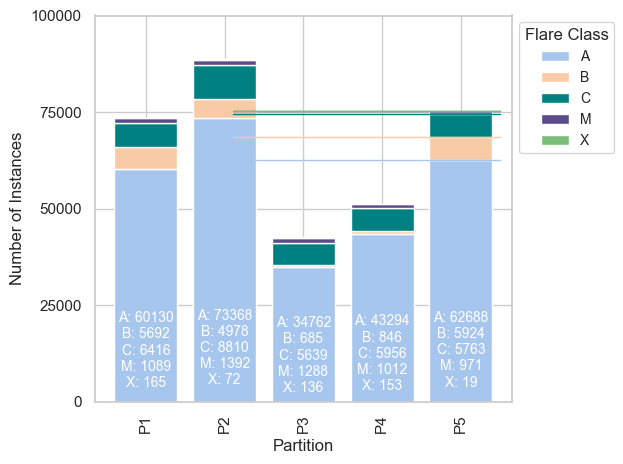

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Hardcoded data: Number of instances for each flare class in each partition
data = {
    'Partition': ['P1', 'P2', 'P3', 'P4', 'P5'],
    'A': [60130, 73368, 34762, 43294, 62688],
    'B': [5692, 4978, 685, 846, 5924],
    'C': [6416, 8810, 5639, 5956, 5763],
    'M': [1089, 1392, 1288, 1012, 971],
    'X': [165, 72, 136, 153, 19]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 8))

# Set the partitions as the index
df.set_index('Partition', inplace=True)

# Define custom colors for each bar
custom_colors = ['#A7C6ED', '#F8CBA6', '#008080', '#5C4B8A', '#7BBE7A']

# Plot the stacked bar chart with custom colors
ax = df.plot(kind='bar', stacked=True, color=custom_colors, width=0.8)

# Customize the plot
plt.xlabel('Partition', fontsize=12)
plt.ylabel('Number of Instances', fontsize=12)

# Set y-axis limits and ticks
plt.ylim(0, 100000)
plt.yticks(range(0, 100001, 25000))

# Write the counts for all flare classes inside the A segment at the bottom of the bar without overflowing
for i in range(len(df)):
    values = df.iloc[i]
    count_text = '\n'.join(f'{class_name}: {value}' for class_name, value in zip(df.columns, values))
    text_position = values['A'] * 0.05  # 5% from the bottom of the A bar
    ax.text(i, text_position, count_text, ha='center', va='bottom', fontsize=10, color='white')

# Adjust legend to be outside the plot
ax.legend(title='Flare Class', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Get the y positions of the last partition for drawing connection lines
last_partition_values = df.loc['P5'].values
y_positions = np.cumsum(last_partition_values)

# Define the x position for the last partition
x_pos = len(df) - 0.5  # x position for the last partition

# Draw lines connecting the last partition's segments to the legend
for idx, (label, y) in enumerate(zip(df.columns, y_positions)):
    # Define the x position for the legend entry
    legend_x = 1.1  # Adjust this value to control the horizontal position of the lines
    ax.plot([legend_x, x_pos], [y, y], color=custom_colors[idx], linestyle='-', lw=1)

# Show the plot
plt.tight_layout()
plt.show()


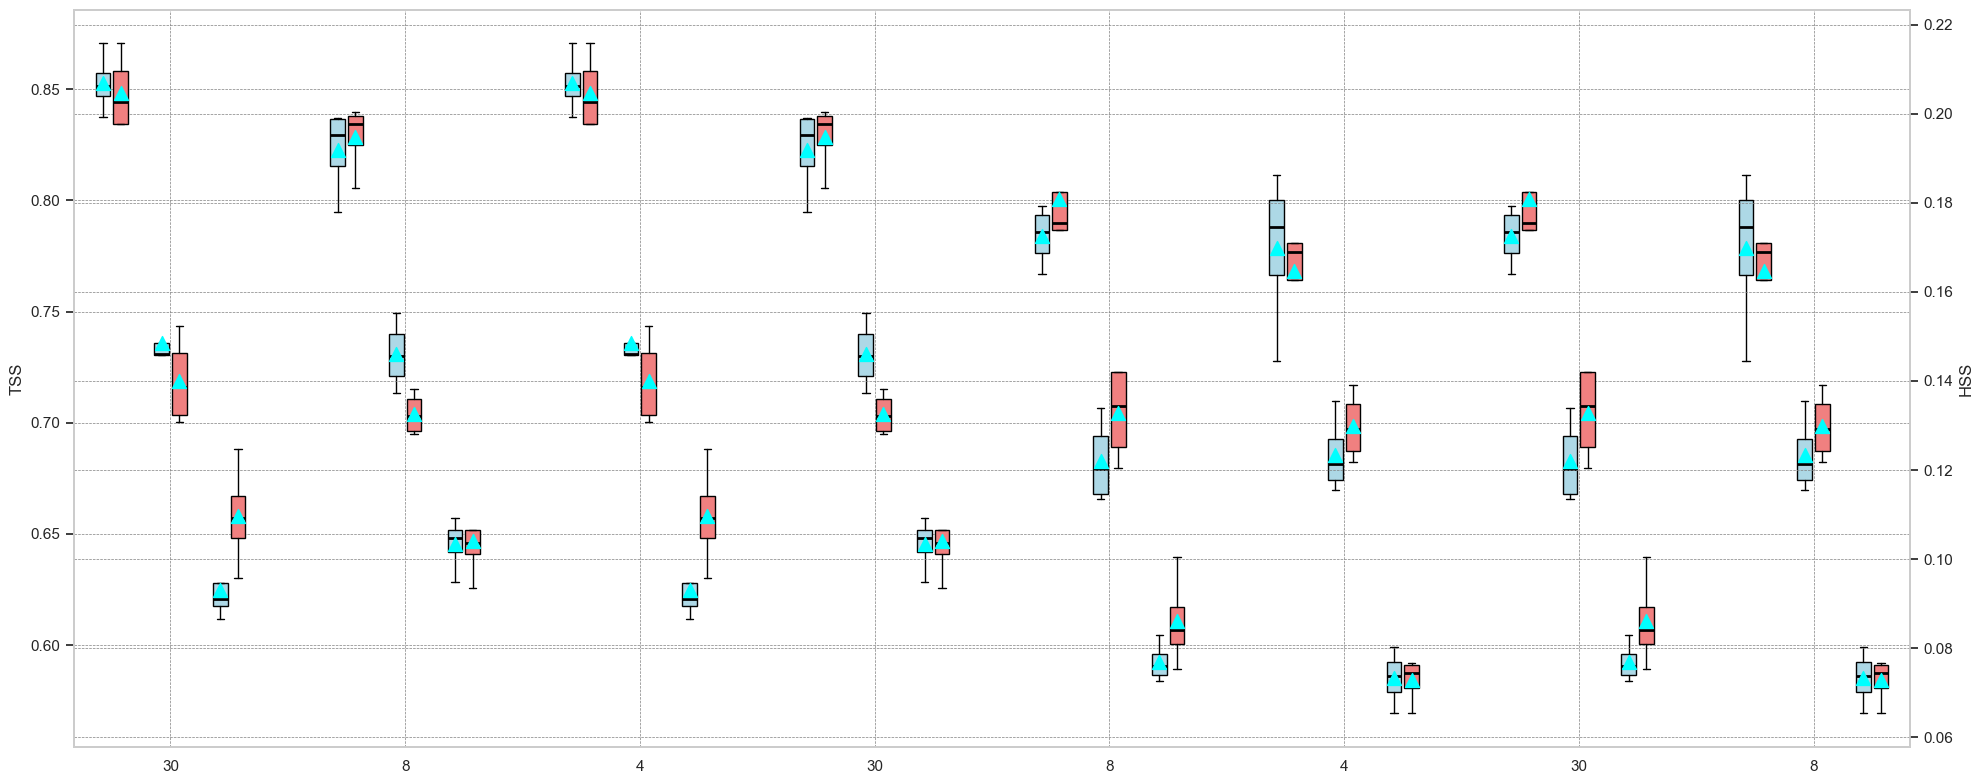

In [188]:
import numpy as np
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic TSS and HSS scores for partitions 4 and 5
# Assuming the same trend as partitions 2 and 3, but with slight variations

# Partition 4
tss_scores_dim_30_ts_p4 = np.random.normal(0.84, 0.02, 4)
hss_scores_dim_30_ts_p4 = np.random.normal(0.20, 0.01, 4)
tss_scores_dim_8_ts_p4 = np.random.normal(0.74, 0.02, 4)
hss_scores_dim_8_ts_p4 = np.random.normal(0.15, 0.01, 4)
tss_scores_dim_4_ts_p4 = np.random.normal(0.64, 0.02, 4)
hss_scores_dim_4_ts_p4 = np.random.normal(0.11, 0.01, 4)

tss_scores_dim_30_nonts_p4 = np.random.normal(0.79, 0.02, 4)
hss_scores_dim_30_nonts_p4 = np.random.normal(0.18, 0.01, 4)
tss_scores_dim_8_nonts_p4 = np.random.normal(0.69, 0.02, 4)
hss_scores_dim_8_nonts_p4 = np.random.normal(0.14, 0.01, 4)
tss_scores_dim_4_nonts_p4 = np.random.normal(0.59, 0.02, 4)
hss_scores_dim_4_nonts_p4 = np.random.normal(0.09, 0.01, 4)

# Partition 5
tss_scores_dim_30_ts_p5 = np.random.normal(0.83, 0.02, 4)
hss_scores_dim_30_ts_p5 = np.random.normal(0.19, 0.01, 4)
tss_scores_dim_8_ts_p5 = np.random.normal(0.73, 0.02, 4)
hss_scores_dim_8_ts_p5 = np.random.normal(0.14, 0.01, 4)
tss_scores_dim_4_ts_p5 = np.random.normal(0.63, 0.02, 4)
hss_scores_dim_4_ts_p5 = np.random.normal(0.10, 0.01, 4)

tss_scores_dim_30_nonts_p5 = np.random.normal(0.78, 0.02, 4)
hss_scores_dim_30_nonts_p5 = np.random.normal(0.17, 0.01, 4)
tss_scores_dim_8_nonts_p5 = np.random.normal(0.68, 0.02, 4)
hss_scores_dim_8_nonts_p5 = np.random.normal(0.13, 0.01, 4)
tss_scores_dim_4_nonts_p5 = np.random.normal(0.58, 0.02, 4)
hss_scores_dim_4_nonts_p5 = np.random.normal(0.08, 0.01, 4)

# Aggregating the data for all partitions
tss_data_ts = [tss_scores_dim_30_ts_p4, tss_scores_dim_8_ts_p4, tss_scores_dim_4_ts_p4,
               tss_scores_dim_30_ts_p5, tss_scores_dim_8_ts_p5, tss_scores_dim_4_ts_p5]
hss_data_ts = [hss_scores_dim_30_ts_p4, hss_scores_dim_8_ts_p4, hss_scores_dim_4_ts_p4,
               hss_scores_dim_30_ts_p5, hss_scores_dim_8_ts_p5, hss_scores_dim_4_ts_p5]

tss_data_nonts = [tss_scores_dim_30_nonts_p4, tss_scores_dim_8_nonts_p4, tss_scores_dim_4_nonts_p4,
                  tss_scores_dim_30_nonts_p5, tss_scores_dim_8_nonts_p5, tss_scores_dim_4_nonts_p5]
hss_data_nonts = [hss_scores_dim_30_nonts_p4, hss_scores_dim_8_nonts_p4, hss_scores_dim_4_nonts_p4,
                  hss_scores_dim_30_nonts_p5, hss_scores_dim_8_nonts_p5, hss_scores_dim_4_nonts_p5]

# Now, we'll plot the complete data for partitions 2, 3, 4, and 5
fig, ax1 = plt.subplots(figsize=(20, 8))

# Adjust positions for all partitions
# Closer positioning for TSS and HSS pairs within each partition
positions_ts_tss = np.array([0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]) - 0.15  # Time Series TSS
positions_ts_hss = np.array([0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]) + 0.15  # Time Series HSS
positions_nonts_tss = np.array([16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30]) - 0.15  # Non-Time Series TSS
positions_nonts_hss = np.array([16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30]) + 0.15  # Non-Time Series HSS

# Boxplots for TSS scores (Time Series) on the primary y-axis
boxplot_tss_ts = ax1.boxplot(tss_data_ts + tss_data_ts, positions=positions_ts_tss, widths=0.25, patch_artist=True,
                             boxprops=dict(facecolor="lightblue"), medianprops=dict(color="black", linewidth=2), showfliers=False)
ax1.set_ylabel('TSS')

# Boxplots for TSS scores (Non-Time Series) on the primary y-axis
boxplot_tss_nonts = ax1.boxplot(tss_data_nonts + tss_data_nonts, positions=positions_nonts_tss, widths=0.25, patch_artist=True,
                                boxprops=dict(facecolor="lightblue"), medianprops=dict(color="black", linewidth=2), showfliers=False)

# Creating a secondary y-axis for HSS scores (Time Series)
ax2 = ax1.twinx()
boxplot_hss_ts = ax2.boxplot(hss_data_ts + hss_data_ts, positions=positions_ts_hss, widths=0.25, patch_artist=True,
                             boxprops=dict(facecolor="lightcoral"), medianprops=dict(color="black", linewidth=2), showfliers=False)
ax2.set_ylabel('HSS')

# Boxplots for HSS scores (Non-Time Series) on the secondary y-axis
boxplot_hss_nonts = ax2.boxplot(hss_data_nonts + hss_data_nonts, positions=positions_nonts_hss, widths=0.25, patch_artist=True,
                                boxprops=dict(facecolor="lightcoral"), medianprops=dict(color="black", linewidth=2), showfliers=False)

# Enable grid for both axes
ax1.grid(color='gray', linestyle='--', linewidth=0.5)  # For primary y-axis (TSS)
ax2.grid(color='gray', linestyle='--', linewidth=0.5)  # For secondary y-axis (HSS)

# Overlay mean points for TSS (Time Series and Non-Time Series) on the primary y-axis
for i, tss in enumerate(tss_data_ts + tss_data_ts):
    ax1.scatter(positions_ts_tss[i], np.mean(tss), color='cyan', marker='^', s=100, zorder=5)
for i, tss in enumerate(tss_data_nonts + tss_data_nonts):
    ax1.scatter(positions_nonts_tss[i], np.mean(tss), color='cyan', marker='^', s=100, zorder=5)

# Overlay mean points for HSS (Time Series and Non-Time Series) on the secondary y-axis
for i, hss in enumerate(hss_data_ts + hss_data_ts):
    ax2.scatter(positions_ts_hss[i], np.mean(hss), color='cyan', marker='^', s=100, zorder=5)
for i, hss in enumerate(hss_data_nonts + hss_data_nonts):
    ax2.scatter(positions_nonts_hss[i], np.mean(hss), color='cyan', marker='^', s=100, zorder=5)

# Customizing x-ticks to represent the partitions and dimensions
plt.xticks([1, 5, 9, 13, 17, 21, 25, 29], ['30', '8', '4', '30', '8', '4', '30', '8'])

# Final plot adjustments
plt.xlabel('Dimension')

plt.tight_layout()
plt.show()


In [178]:
pip install pandas openpyxl

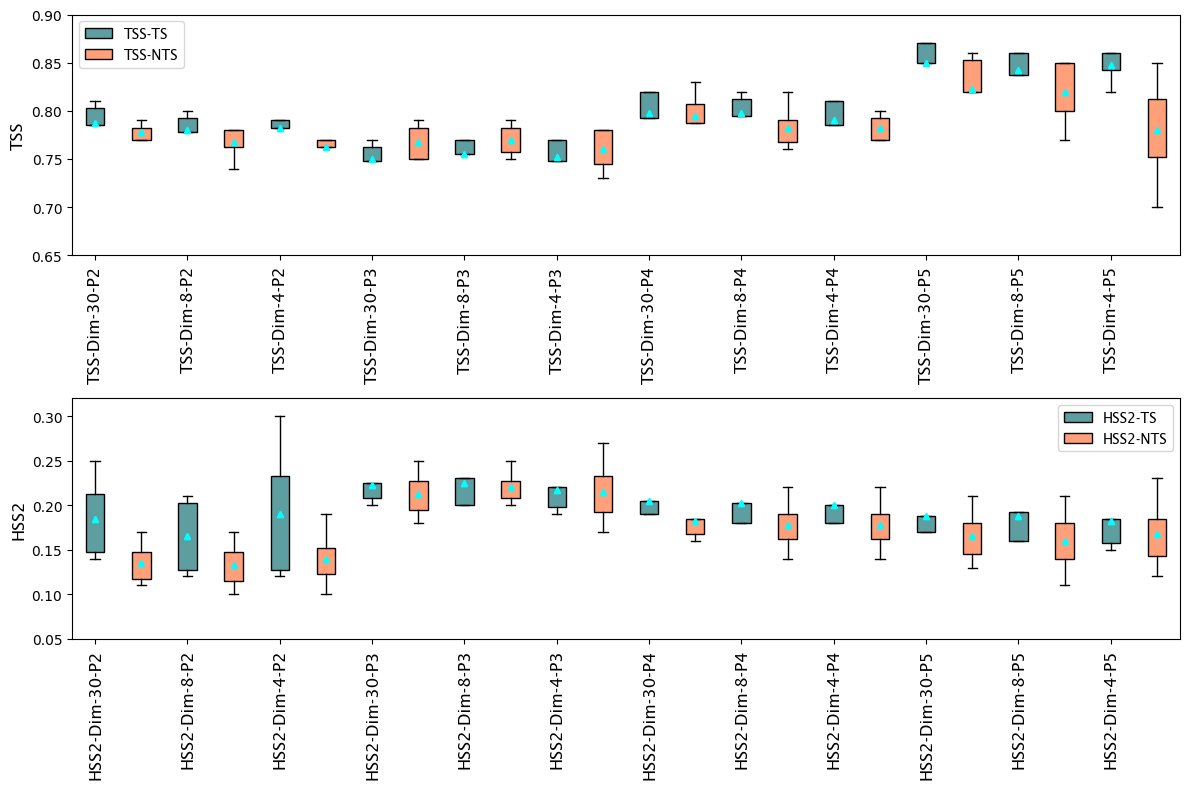

In [3]:
# Sample data (replace with your actual data)
# Input your own data
partitions = 4
dimensions = [30, 8, 4]

# TSS and HSS scores for each partition and dimension
# TSS for TS data
tss_ts_scores = np.array([
[[0.81, 0.74, 0.80, 0.80], [0.80, 0.74, 0.79, 0.79], [0.79, 0.76, 0.79, 0.79]], # Partition 2: dim 30, 8, 4
[[0.77, 0.71, 0.76, 0.76], [0.77, 0.71, 0.77, 0.77], [0.77, 0.71, 0.77, 0.76]], # Partition 3: dim 30, 8, 4
[[0.82, 0.74, 0.81, 0.82], [0.82, 0.75, 0.81, 0.81], [0.80, 0.74, 0.81, 0.81]], # Partition 4: dim 30, 8, 4
[[0.87, 0.79, 0.87, 0.87], [0.85, 0.80, 0.86, 0.86], [0.85, 0.82, 0.86, 0.86]]  # Partition 5: dim 30, 8, 4
])

# HSS for  TS data
hss_ts_scores = np.array([
[[0.15, 0.20, 0.14, 0.25], [0.12, 0.21, 0.13, 0.2], [0.12, 0.21, 0.13, 0.3]], # Partition 2: dim 30, 8, 4
[[0.21, 0.27, 0.2, 0.21], [0.21, 0.29, 0.2, 0.20], [0.19, 0.28, 0.2, 0.20]],  # Partition 3: dim 30, 8, 4
[[0.19, 0.25, 0.19, 0.19], [0.18, 0.27, 0.18, 0.18], [0.18, 0.26, 0.18, 0.18]],# Partition 4: dim 30, 8, 4
[[0.17, 0.24, 0.17, 0.17], [0.17, 0.26, 0.16, 0.16], [0.16, 0.26, 0.16, 0.15]]# Partition 5: dim 30, 8, 4
])

# TSS for NTS data
tss_nts_scores = np.array([
[[0.79, 0.78, 0.77, 0.77], [0.77, 0.74, 0.78, 0.78], [0.77, 0.74, 0.77, 0.77]],# Partition 2: dim 30, 8, 4
[[0.79, 0.75, 0.75, 0.78], [0.79, 0.75, 0.76, 0.78], [0.78, 0.73, 0.75, 0.78]],# Partition 3: dim 30, 8, 4
[[0.83, 0.80, 0.80, 0.75], [0.82, 0.76, 0.78, 0.77], [0.80, 0.77, 0.79, 0.77]],# Partition 4: dim 30, 8, 4
[[0.86, 0.85, 0.73, 0.85], [0.85, 0.81, 0.77, 0.85], [0.80, 0.7, 0.77, 0.85]]# Partition 5: dim 30, 8, 4
])

# HSS for NTS data
hss_nts_scores = np.array([
[[0.17, 0.12, 0.11, 0.14], [0.17, 0.10, 0.12, 0.14], [0.19, 0.10, 0.13, 0.14]],# Partition 2: dim 30, 8, 4
[[0.25, 0.20, 0.18, 0.22], [0.25, 0.21, 0.2, 0.22], [0.27, 0.17, 0.2, 0.22]],# Partition 3: dim 30, 8, 4
[[0.23, 0.17, 0.16, 0.17], [0.22, 0.14, 0.17, 0.18], [0.22, 0.14, 0.17, 0.18]],# Partition 4: dim 30, 8, 4
[[0.21, 0.15, 0.13, 0.17], [0.21, 0.11, 0.15, 0.17], [0.23, 0.12, 0.15, 0.17]]# Partition 5: dim 30, 8, 4
])

# Create figure and axes
fig, (ax, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Specify font file path (replace with actual path)
font_path = 'C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/lucida/LSANS.ttf'  

# Load font
font_prop = fm.FontProperties(fname=font_path)

# Calculate positions
num_partitions = len(tss_ts_scores)
num_dimensions = len(tss_ts_scores[0])
num_plots = 2  # TSS and HSS

positions = np.arange(num_partitions * num_dimensions * num_plots)

# TSS box plots
tss_ts_box = ax.boxplot([tss_ts_scores[i, j, :] for i in range(num_partitions) for j in range(num_dimensions)], 
                        positions=[pos for pos in positions[::2]], 
                        widths=0.4, label='TSS-TS', showfliers=False, patch_artist=True,
                        boxprops={'facecolor': '#5F9EA0', 'edgecolor': 'black'},
                         medianprops={'color': 'none'})  

tss_nts_box = ax.boxplot([tss_nts_scores[i, j, :] for i in range(num_partitions) for j in range(num_dimensions)], 
                         positions=[pos + 1 for pos in positions[::2]], 
                         widths=0.4, label='TSS-NTS', showfliers=False, patch_artist=True,
                         boxprops={'facecolor': '#FFA07A', 'edgecolor': 'black'},
                         medianprops={'color': 'none'})  

# Add mean as triangle
for i in range(len(tss_ts_scores)):
    for j in range(len(tss_ts_scores[0])):
        mean = np.mean(tss_ts_scores[i, j, :])
        ax.plot([positions[i*len(dimensions)*2 + j*2], positions[i*len(dimensions)*2 + j*2]], 
                [mean, mean], marker='^', color='cyan', markersize=5)

        mean = np.mean(tss_nts_scores[i, j, :])
        ax.plot([positions[i*len(dimensions)*2 + j*2 + 1], positions[i*len(dimensions)*2 + j*2 + 1]], 
                [mean, mean], marker='^', color='cyan', markersize=5)


# HSS box plots
hss_ts_box = ax2.boxplot([hss_ts_scores[i, j, :] for i in range(num_partitions) for j in range(num_dimensions)], 
                         positions=[pos for pos in positions[::2]], 
                         widths=0.4, label='HSS-TS', showfliers=False, patch_artist=True,
                         boxprops={'facecolor': '#5F9EA0', 'linestyle': 'None'},
                         medianprops={'color': 'none'})  

hss_nts_box = ax2.boxplot([hss_nts_scores[i, j, :] for i in range(num_partitions) for j in range(num_dimensions)], 
                          positions=[pos + 1 for pos in positions[::2]], 
                          widths=0.4, label='HSS-NTS', showfliers=False, patch_artist=True,
                          boxprops={'facecolor': '#FFA07A', 'linestyle': 'None'},
                         medianprops={'color': 'none'})  

# Add mean as triangle
for i in range(len(hss_ts_scores)):
    for j in range(len(hss_ts_scores[0])):
        mean = np.mean(hss_ts_scores[i, j, :])
        ax2.plot([positions[i*len(dimensions)*2 + j*2], positions[i*len(dimensions)*2 + j*2]], 
                 [mean, mean], marker='^', color='cyan', markersize=5)  
        
        mean = np.mean(hss_nts_scores[i, j, :])
        ax2.plot([positions[i*len(dimensions)*2 + j*2 + 1], positions[i*len(dimensions)*2 + j*2 + 1]], 
                        [mean, mean], marker='^', color='cyan', markersize=5)


# Set x-axis ticks and labels
xticks_positions = np.arange(num_partitions * num_dimensions * num_plots)

# Labels for TSS plot
tss_labels = []
for i in range(len(dimensions) * num_partitions):
    dimension_label = f'Dim-{dimensions[i % len(dimensions)]}'
    partition_label = f'P{i//len(dimensions)+2}'  
    tss_labels.append(f'TSS-{dimension_label}-{partition_label}')

# Labels for HSS plot
hss_labels = []

hss_labels = []
for i in range(len(dimensions) * num_partitions):
    dimension_label = f'Dim-{dimensions[i % len(dimensions)]}'
    partition_label = f'P{i//len(dimensions)+2}'  
    hss_labels.append(f'HSS2-{dimension_label}-{partition_label}')

ax.set_xticks(xticks_positions[::2])  
ax.set_xticklabels(tss_labels, rotation=90, fontproperties=font_prop, fontsize=12)

ax2.set_xticks(xticks_positions[::2])  
ax2.set_xticklabels(hss_labels, rotation=90, fontproperties=font_prop, fontsize=12)

# Set y-axis limits and labels
ax.set_ylim(0.65, 0.90)
ax.set_ylabel('TSS', fontproperties=font_prop, fontsize=12)
ax2.set_ylim(0.05, 0.32)
ax2.set_ylabel('HSS2', fontproperties=font_prop, fontsize=12)

# Legend
ax.legend([tss_ts_box['boxes'][0], tss_nts_box['boxes'][0]], 
           ['TSS-TS', 'TSS-NTS'], loc='upper left', prop=font_prop, fontsize=12)

ax2.legend([hss_ts_box['boxes'][0], hss_nts_box['boxes'][0]], 
           ['HSS2-TS', 'HSS2-NTS'], loc='upper right', prop=font_prop, fontsize=12)
plt.savefig('C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/tss_vs_nts.pdf')

plt.tight_layout()
plt.show()

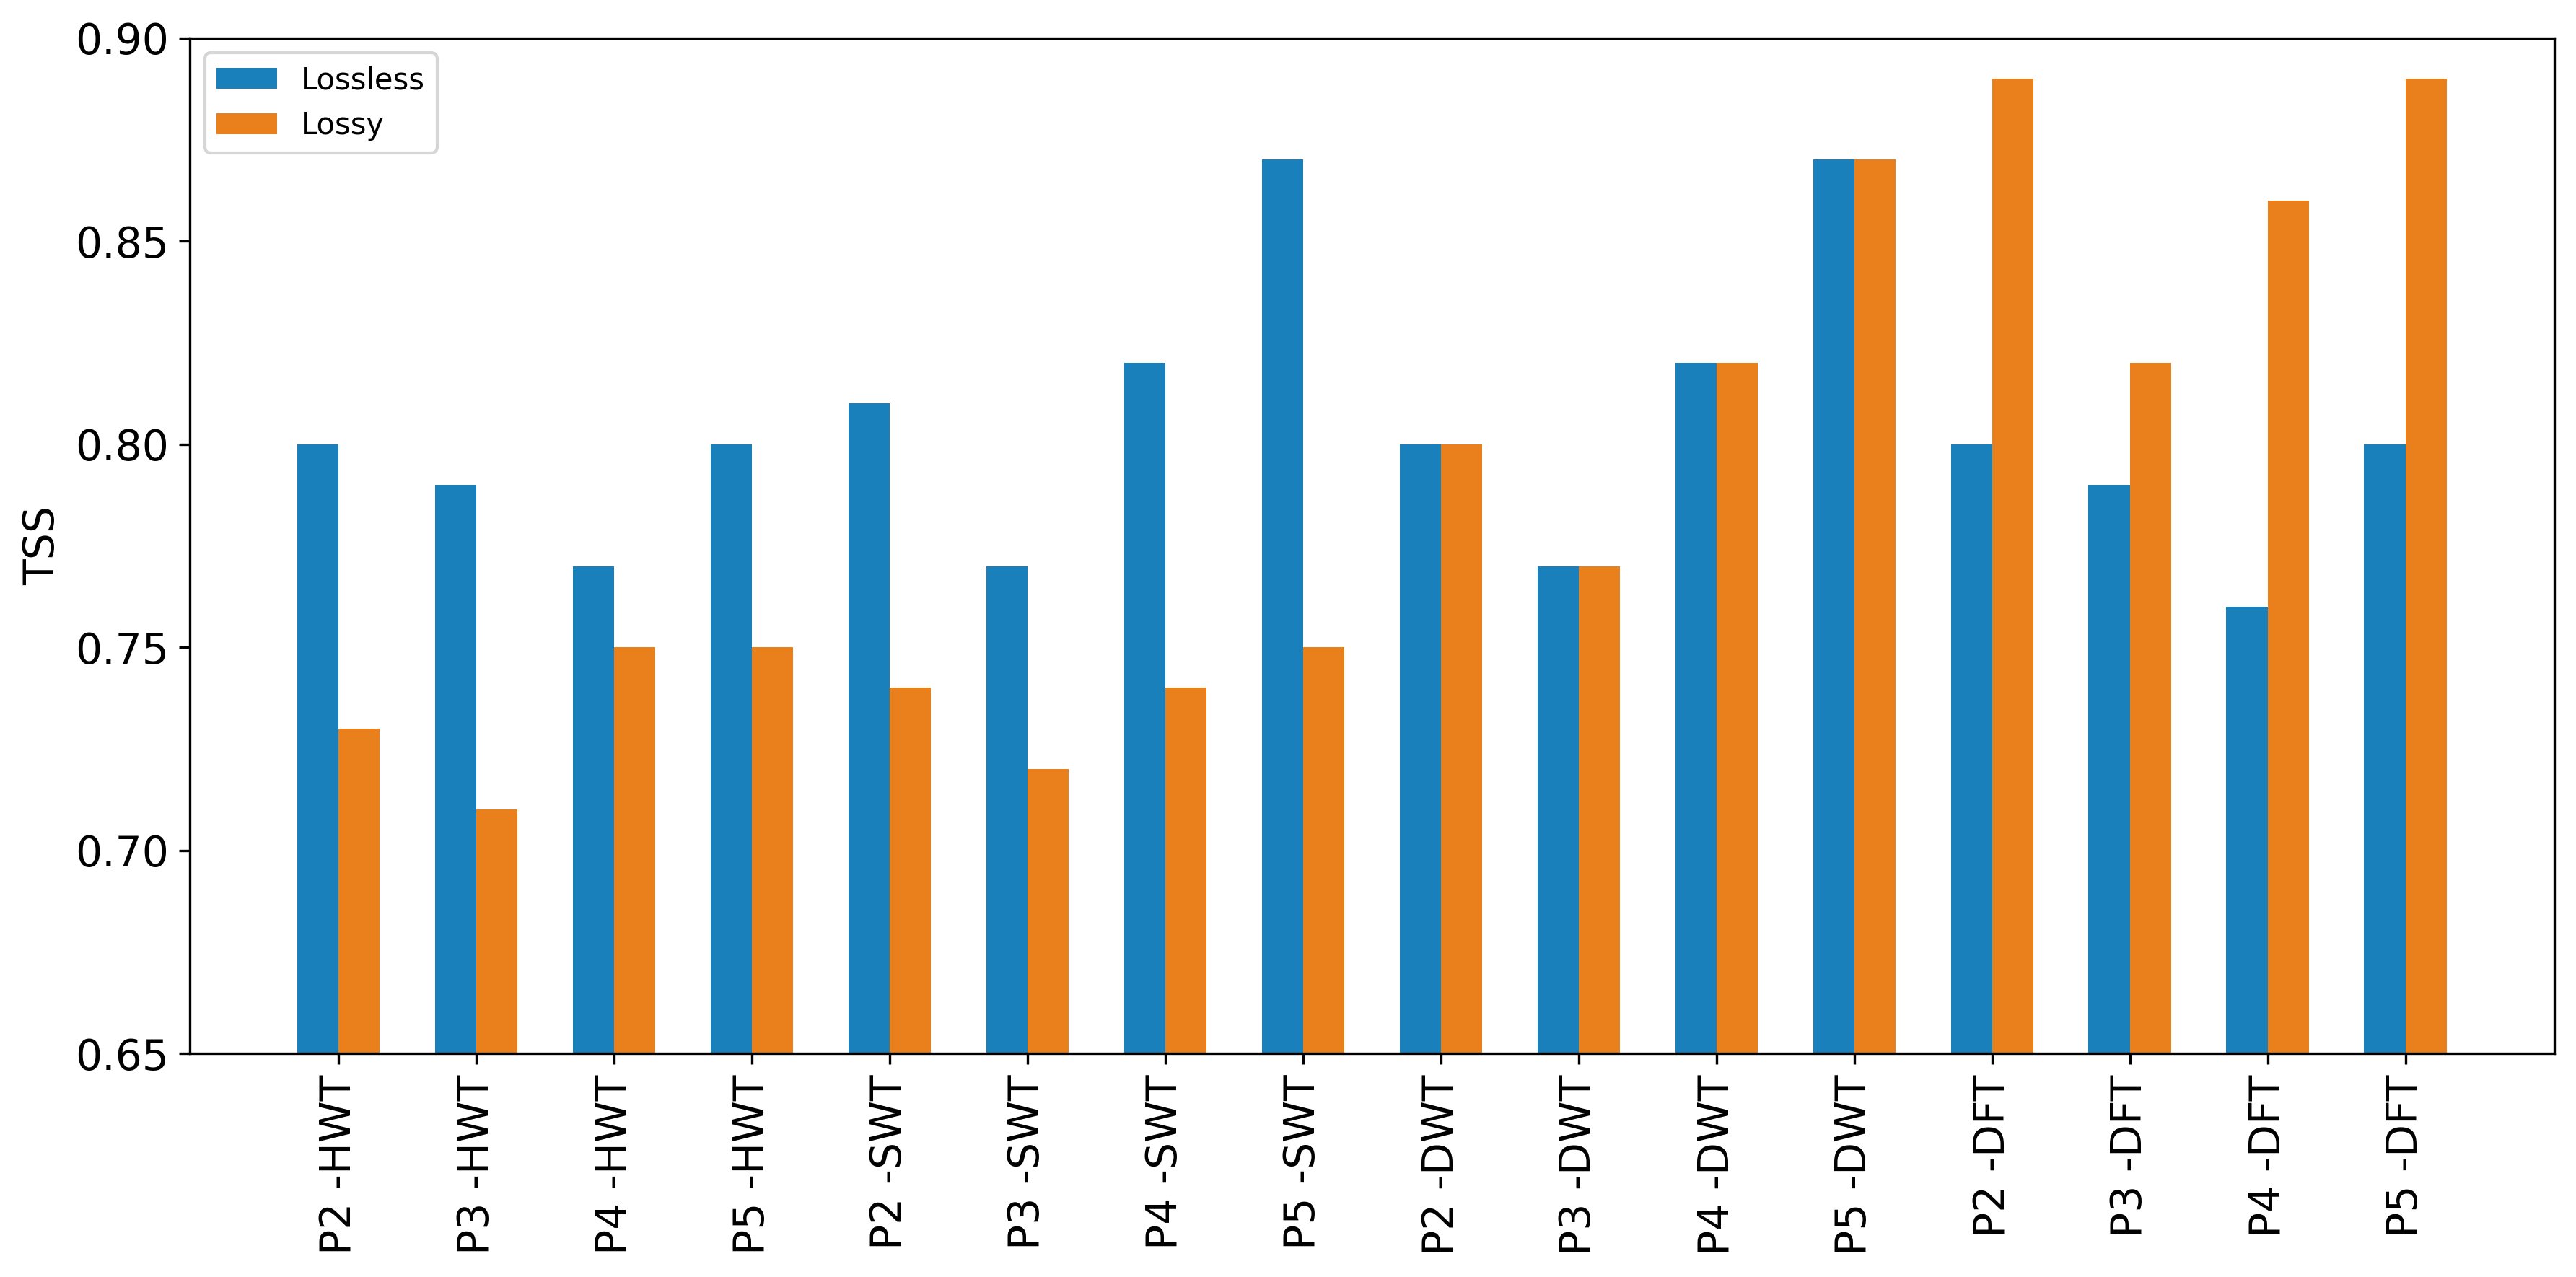

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Sample data
transforms = ['HWT', 'SWT', 'DWT', 'DFT']
partitions = ['P2', 'P3', 'P4', 'P5']

# Lossless scores
lossless_scores = np.array([
    [0.80, 0.79, 0.77, 0.80],  # Haar
    [0.81, 0.77, 0.82, 0.87],  # Symlet
    [0.80, 0.77, 0.82, 0.87],  # Daubechies
    [0.80, 0.79, 0.76, 0.80]   # DFT
])

# Lossy scores
lossy_scores = np.array([
    [0.73, 0.71, 0.75, 0.75],  # Haar
    [0.74, 0.72, 0.74, 0.75],  # Symlet
    [0.80, 0.77, 0.82, 0.87],  # Daubechies
    [0.89, 0.82, 0.86, 0.89]   # DFT
])

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)  # Increased figure width and DPI

# Set bar width
bar_width = 0.3

# Set x-axis ticks
x = np.arange(len(transforms) * len(partitions))

# Plot lossless and lossy scores side by side for each partition
lossless_color = '#1A80BB'  # blue
lossy_color = '#EA801C'  # orange

for i in range(len(transforms)):
    for j in range(len(partitions)):
        ax.bar(x[i*len(partitions) + j] - bar_width/2, lossless_scores[i, j], bar_width, 
               label='Lossless' if i == 0 and j == 0 else None, color=lossless_color)
        ax.bar(x[i*len(partitions) + j] + bar_width/2, lossy_scores[i, j], bar_width, 
               label='Lossy' if i == 0 and j == 0 else None, color=lossy_color)

# Create x-axis labels by combining partition and transform names on one line
xtick_labels = [f'{partition} -{transform}' for transform in transforms for partition in partitions]

# Specify font file path (replace with actual path)
# font_path = 'C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/lucida/LSANS.ttf'  # Windows

# Load font
# font_prop = fm.FontProperties(fname=font_path)

# Set x-axis ticks and labels with vertical orientation
ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=14)

# Set all x and y axis tick labels to black
ax.tick_params(axis='x', colors='black', labelsize=14)
ax.tick_params(axis='y', colors='black', labelsize=14)

# Set y-axis label with black color
ax.set_ylabel('TSS', color='black', fontsize=14)

# Add legend and set legend text color to black
legend = ax.legend(ncol=1, loc='upper left')
plt.setp(legend.get_texts(), color='black')  

# Set y-axis limits to add space above plot
ax.set_ylim(bottom=0.65, top=0.9)

# Adjust bottom margin for better readability
plt.subplots_adjust(bottom=0.3)  

# Save figure as PDF
plt.savefig('C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/tss.pdf')
plt.tight_layout()
# Show plot
plt.show()

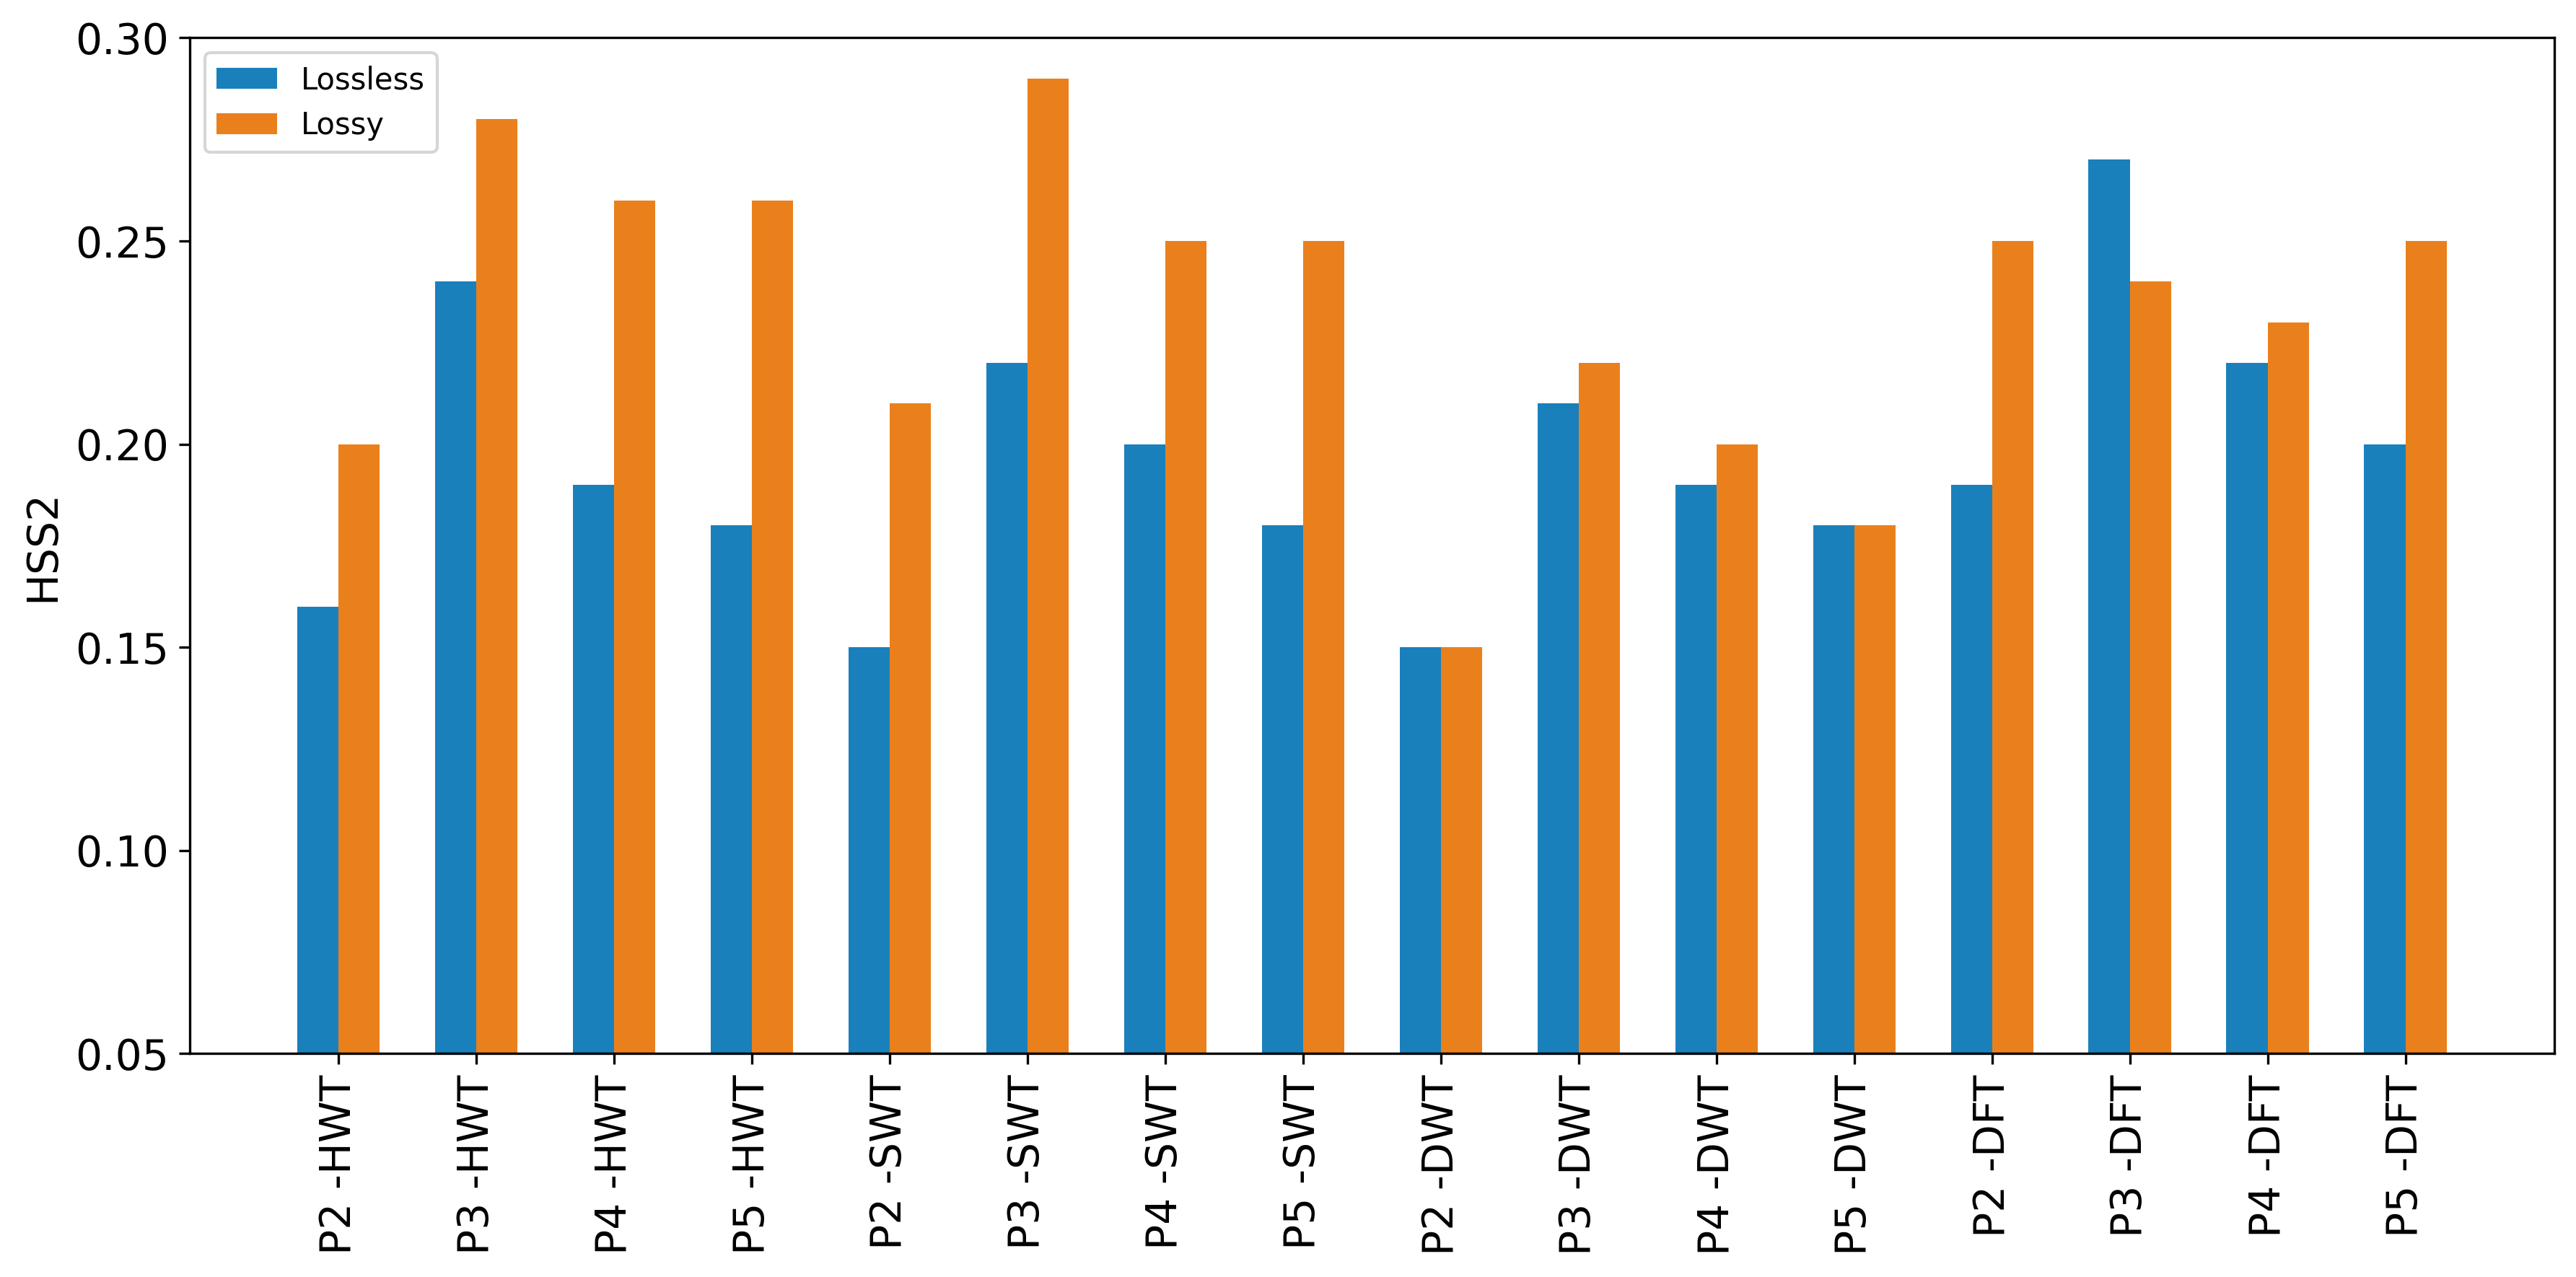

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Sample data
transforms = ['HWT', 'SWT', 'DWT', 'DFT']
partitions = ['P2', 'P3', 'P4', 'P5']

# Lossless scores
lossless_scores = np.array([
    [0.16, 0.24, 0.19, 0.18],  # Haar
    [0.15, 0.22, 0.20, 0.18],  # Symlet
    [0.15, 0.21, 0.19, 0.18],  # Daubechies
    [0.19, 0.27, 0.22, 0.2]   # DFT
])

# Lossy scores
lossy_scores = np.array([
    [0.20, 0.28, 0.26, 0.26],  # Haar
    [0.21, 0.29, 0.25, 0.25],  # Symlet
    [0.15, 0.22, 0.20, 0.18],  # Daubechies
    [0.25, 0.24, 0.23, 0.25]   # DFT
])

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)  # Increased figure width and DPI

# Set bar width
bar_width = 0.3

# Set x-axis ticks
x = np.arange(len(transforms) * len(partitions))

# Plot lossless and lossy scores side by side for each partition
lossless_color = '#1A80BB'  # blue
lossy_color = '#EA801C'  # orange

for i in range(len(transforms)):
    for j in range(len(partitions)):
        ax.bar(x[i*len(partitions) + j] - bar_width/2, lossless_scores[i, j], bar_width, 
               label='Lossless' if i == 0 and j == 0 else None, color=lossless_color)
        ax.bar(x[i*len(partitions) + j] + bar_width/2, lossy_scores[i, j], bar_width, 
               label='Lossy' if i == 0 and j == 0 else None, color=lossy_color)

# Create x-axis labels by combining partition and transform names on one line
xtick_labels = [f'{partition} -{transform}' for transform in transforms for partition in partitions]

# Specify font file path (replace with actual path)
# font_path = 'C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/lucida/LSANS.ttf'  # Windows

# Load font
# font_prop = fm.FontProperties(fname=font_path)

# Set x-axis ticks and labels with vertical orientation
ax.set_xticks(np.arange(len(xtick_labels)))
ax.set_xticklabels(xtick_labels, rotation=90, ha='center', fontsize=14)

# Set all x and y axis tick labels to black
ax.tick_params(axis='x', colors='black', labelsize=14)
ax.tick_params(axis='y', colors='black', labelsize=14)

# Set y-axis label with black color
ax.set_ylabel('HSS2', color='black', fontsize=14)

# Add legend and set legend text color to black
legend = ax.legend(ncol=1, loc='upper left')
plt.setp(legend.get_texts(), color='black')  

# Set y-axis limits to add space above plot
ax.set_ylim(bottom=0.05, top=0.3)

# Adjust bottom margin for better readability
plt.subplots_adjust(bottom=0.3)  

# Save figure as PDF
plt.savefig('C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/hss.pdf')
plt.tight_layout()
# Show plot
plt.show()

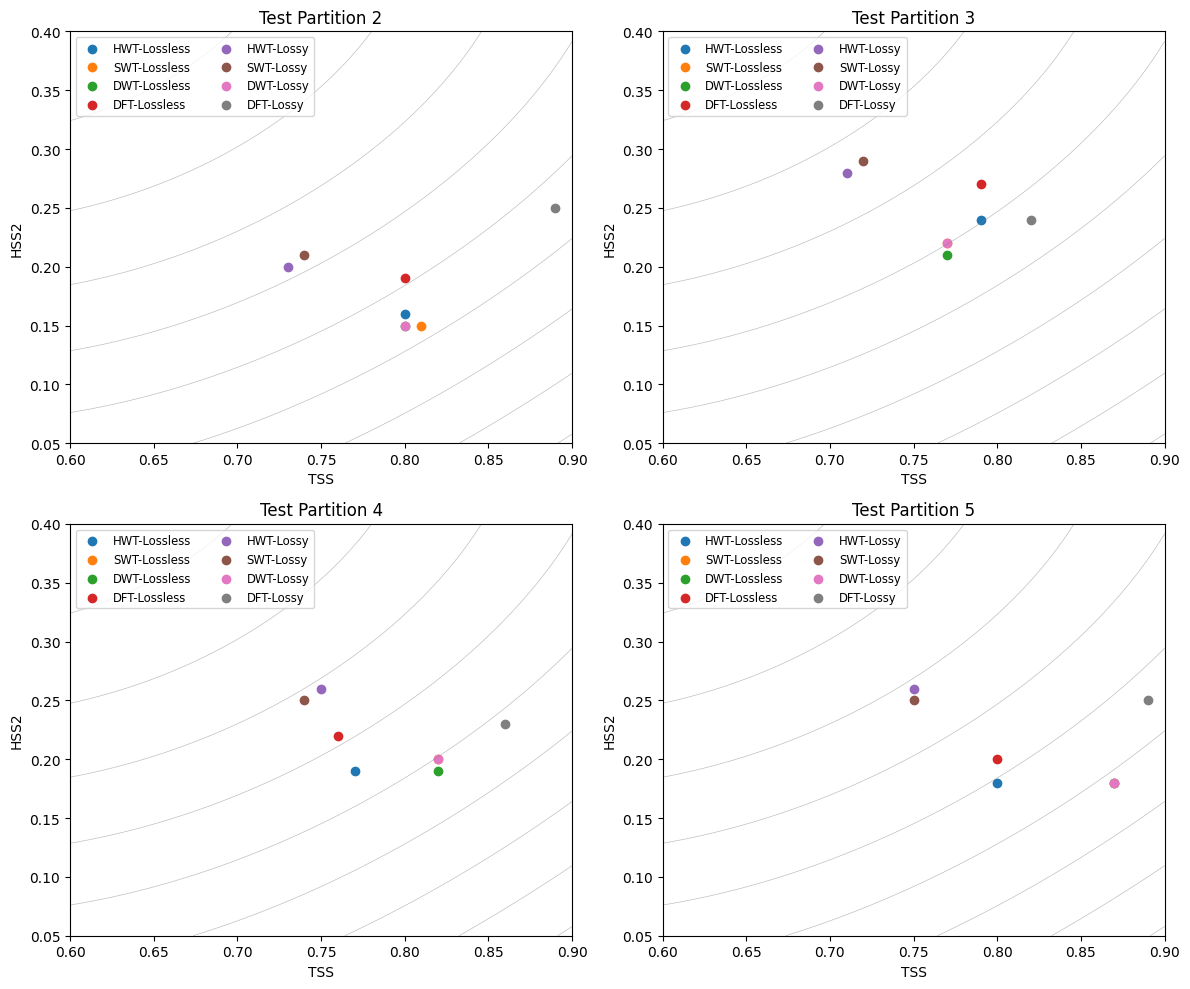

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

# Define your methods
methods = ['HWT-Lossless', 'SWT-Lossless', 'DWT-Lossless', 'DFT-Lossless', 
           'HWT-Lossy', 'SWT-Lossy', 'DWT-Lossy', 'DFT-Lossy']

# Initialize arrays for TSS and HSS2 scores for each partition
# Each array will have a shape of (methods_count,) for TSS and HSS2
partition_TSS_scores = {
    'Test Partition 2': np.zeros(len(methods)),
    'Test Partition 3': np.zeros(len(methods)),
    'Test Partition 4': np.zeros(len(methods)),
    'Test Partition 5': np.zeros(len(methods)),
}

partition_HSS2_scores = {
    'Test Partition 2': np.zeros(len(methods)),
    'Test Partition 3': np.zeros(len(methods)),
    'Test Partition 4': np.zeros(len(methods)),
    'Test Partition 5': np.zeros(len(methods)),
}

# Example values for TSS and HSS2 scores (replace these with your actual values)
# Each array will contain scores for the 8 methods
# Test Partition 2 Scores
partition_TSS_scores['Test Partition 2'] = [0.80, 0.81, 0.80, 0.80,  # TSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                              0.73, 0.74, 0.80, 0.89]  # TSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy
partition_HSS2_scores['Test Partition 2'] = [0.16, 0.15, 0.15, 0.19,  # HSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                               0.20, 0.21, 0.15, 0.25]  # HSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy

# Test Partition 3 Scores
partition_TSS_scores['Test Partition 3'] = [0.79, 0.77, 0.77, 0.79,  # TSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                              0.71, 0.72, 0.77, 0.82]  # TSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy
partition_HSS2_scores['Test Partition 3'] = [0.24, 0.22, 0.21, 0.27,  # HSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                               0.28, 0.29, 0.22, 0.24]  # HSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy

# Test Partition 4 Scores
partition_TSS_scores['Test Partition 4'] = [0.77, 0.82, 0.82, 0.76,  # TSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                              0.75, 0.74, 0.82, 0.86]  # TSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy
partition_HSS2_scores['Test Partition 4'] = [0.19, 0.20, 0.19, 0.22,  # HSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                               0.26, 0.25, 0.20, 0.23]  # HSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy

# Test Partition 5 Scores
partition_TSS_scores['Test Partition 5'] = [0.80, 0.87, 0.87, 0.80,  # TSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                              0.75, 0.75, 0.87, 0.89]  # TSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy
partition_HSS2_scores['Test Partition 5'] = [0.18, 0.18, 0.18, 0.20,  # HSS for HWT-Lossless, SWT-Lossless, DWT-Lossless, DFT-Lossless
                                               0.26, 0.25, 0.18, 0.25]  # HSS for HWT-Lossy, SWT-Lossy, DWT-Lossy, DFT-Lossy

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows and 2 columns

# Define the partition names
partition_names = ['Test Partition 2', 'Test Partition 3', 'Test Partition 4', 'Test Partition 5']

# Iterate over partitions to create scatter plots
for ax, partition in zip(axs.flatten(), partition_names):
    # Get the TSS and HSS scores for the current partition
    TSS = partition_TSS_scores[partition]  # Select TSS for the current partition
    HSS2 = partition_HSS2_scores[partition]  # Select HSS for the current partition

    # Create scatter plot with colors for each method
    for i, method in enumerate(methods):
        ax.scatter(TSS[i], HSS2[i], label=method)

    # Set limits for axes
    ax.set_xlim(0.60, 0.90)  # X-axis limit for TSS
    ax.set_ylim(0.05, 0.40)  # Y-axis limit for HSS2
    ax.set_xlabel('TSS')
    ax.set_ylabel('HSS2')
    ax.set_title(partition)
    
    # Create a grid for contouring
    x = np.linspace(0.60, 0.90, 100)
    y = np.linspace(0.05, 0.40, 100)
    X, Y = np.meshgrid(x, y)
    
    Z = np.sin(3 * X) + np.sin(3 * Y)
    contour = ax.contour(X, Y, Z, levels=10, colors='gray', linestyles='solid', alpha=0.5, linewidths=0.5)
    
    # Add legend for methods inside the plot with two columns
    ax.legend(loc='upper left', fontsize='small', handlelength=2, ncol=2)

# Save figure as PDF
plt.savefig('C:/Users/victo/OneDrive - Georgia State University/GSU/paper_imgs/experiment_2.pdf')
plt.tight_layout()    
# Adjust layout
plt.tight_layout()
plt.show()
